# Align visium data with Visiopharm image

https://www.statology.org/pandas-get-rows-not-in-another-dataframe/

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.spatial.html

https://support.10xgenomics.com/spatial-gene-expression/software/pipelines/latest/output/spatial

https://squidpy.readthedocs.io/en/stable/auto_tutorials/tutorial_read_spatial.html
publi: 
https://www.biorxiv.org/content/10.1101/2023.04.11.534630v1.full.pdf

https://stackoverflow.com/questions/33094509/correct-sizing-of-markers-in-scatter-plot-to-a-radius-r-in-matplotlib

https://www.pythonpool.com/matplotlib-circle/

# 1. Import packages and data

pip install scanpy

pip install opencv-python

In [1]:
import os
import pandas as pd
import cv2
from matplotlib import pyplot as plt

# for ST data
import scanpy as sc

Import morphological features : 

In [1]:
PDAC_A1 = pd.read_csv("morphoplogical_features/PDAC_A1_df")
PDAC_B2 = pd.read_csv("morphoplogical_features/PDAC_B2_df")
PanCN_C3 = pd.read_csv("morphoplogical_features/PanCN_C3_df")
PanCN_D4 = pd.read_csv("morphoplogical_features/PanCN_D4_df")

NameError: name 'pd' is not defined

Import images :

In [7]:
input_images = "./../input_images"

In [8]:
img_A1 = cv2.imread(f'{input_images}/PDAC_12747476B_A1.jpg')
img_B2 = cv2.imread(f'{input_images}/PDAC_ILS50185PT2_B2.jpg')
img_C3 = cv2.imread(f'{input_images}/PanCN_AVD_79MZ_0594_C3.jpg')
img_D4 = cv2.imread(f'{input_images}/PanCN_AVD_61VQ_0158_D4.jpg')

Import visium data :

In [14]:
PDAC_A1_visium = sc.read_visium("./visium/PDAC_A1/")
PDAC_B2_visium = sc.read_visium("./visium/PDAC_B2/")
PanCN_C3_visium = sc.read_visium("./visium/PanCN_C3/")
PanCN_D4_visium = sc.read_visium("./visium/PanCN_D4/")

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Import tissue_positions df : 

In [57]:
PDAC_A1_tissue_positions = pd.read_csv("visium/PDAC_A1/spatial/tissue_positions_list.csv", header = None)
PDAC_B2_tissue_positions = pd.read_csv("visium/PDAC_B2/spatial/tissue_positions_list.csv", header = None)
PanCN_C3_tissue_positions = pd.read_csv("visium/PanCN_C3/spatial/tissue_positions_list.csv", header = None)
PanCN_D4_tissue_positions = pd.read_csv("visium/PanCN_D4/spatial/tissue_positions_list.csv", header = None)

# 2. Align spots on image

## 2.1. A1

### 2.1.1. Pretreat AnnData.obs 

In [7]:
PDAC_B2_visium.obsm['spatial']

array([[12691, 10795],
       [ 6316,  1757],
       [11887,  3916],
       ...,
       [ 9988,  7140],
       [ 4476,  9753],
       [ 7186,  2529]])

In [9]:
PDAC_A1_visium.obs = PDAC_A1_visium.obs.reset_index()
PDAC_A1_visium.obs = PDAC_A1_visium.obs.rename(columns={"index": "probes"})
PDAC_A1_visium.obs

probes  in_tissue  array_row  array_col
0     AAACAAGTATCTCCCA-1          1         50        102
1     AAACAGAGCGACTCCT-1          1         14         94
2     AAACATTTCCCGGATT-1          1         61         97
3     AAACCGGGTAGGTACC-1          1         42         28
4     AAACCGTTCGTCCAGG-1          1         52         42
...                  ...        ...        ...        ...
2363  TTGTTAGCAAATTCGA-1          1         22         42
2364  TTGTTCAGTGTGCTAC-1          1         24         64
2365  TTGTTGTGTGTCAAGA-1          1         31         77
2366  TTGTTTCCATACAACT-1          1         45         27
2367  TTGTTTGTGTAAATTC-1          1          7         51

[2368 rows x 4 columns]

### 2.1.2. Pretreat tissue position df 

In [10]:
PDAC_A1_tissue_positions = PDAC_A1_tissue_positions.rename(columns={0: "probes"})
PDAC_A1_tissue_positions

probes  1   2    3      4      5
0     ACGCCTGACACGCGCT-1  0   0    0   1228   1638
1     TACCGATCCAACACTT-1  0   1    1   1420   1745
2     ATTAAAGCGGACGAGC-1  0   0    2   1230   1857
3     GATAAGGGACGATTAG-1  0   1    3   1422   1965
4     GTGCAAATCACCAATA-1  0   0    4   1232   2076
...                  ... ..  ..  ...    ...    ...
4987  GAACGTTTGTATCCAC-1  0  77  123  16060  14966
4988  ATTGAATTCCCTGTAG-1  0  76  124  15870  15078
4989  TACCTCACCAATTGTA-1  0  77  125  16062  15185
4990  AGTCGAATTAGCGTAA-1  0  76  126  15873  15297
4991  TTGAAGTGCATCTACA-1  0  77  127  16065  15404

[4992 rows x 6 columns]

### 2.1.3 Merged the two dataframe by common rows 

In [11]:
PDAC_A1_merged = pd.merge(PDAC_A1_visium.obs, PDAC_A1_tissue_positions, how='inner', on=['probes'])
PDAC_A1_merged

probes  in_tissue  array_row  array_col  1   2    3      4  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102  10885   
1     AAACAGAGCGACTCCT-1          1         14         94  1  14   94   4008   
2     AAACATTTCCCGGATT-1          1         61         97  1  61   97  12977   
3     AAACCGGGTAGGTACC-1          1         42         28  1  42   28   9272   
4     AAACCGTTCGTCCAGG-1          1         52         42  1  52   42  11196   
...                  ...        ...        ...        ... ..  ..  ...    ...   
2363  TTGTTAGCAAATTCGA-1          1         22         42  1  22   42   5474   
2364  TTGTTCAGTGTGCTAC-1          1         24         64  1  24   64   5881   
2365  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77   7231   
2366  TTGTTTCCATACAACT-1          1         45         27  1  45   27   9843   
2367  TTGTTTGTGTAAATTC-1          1          7         51  1   7   51   2623   

          5  
0     12719  
1     11915  
2     12148  
3      4622  
4      6137  
...     ...  
2363   6198  
2364   8605  
2365  10016  
2366   4506  
2367   7215  

[2368 rows x 9 columns]

In [12]:
y_A1 = list(PDAC_A1_merged[4])
x_A1 = list(PDAC_A1_merged[5])

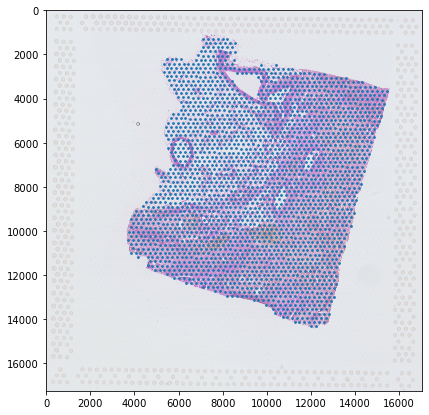

In [12]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(img_A1)
plt.scatter(x_A1,y_A1, s = 3)

## 2.2. B2

### 2.2.1. Pretreat AnnData.obs 

In [11]:
PDAC_B2_visium

AnnData object with n_obs × n_vars = 3085 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [12]:
PDAC_B2_visium.obs = PDAC_B2_visium.obs.reset_index()
PDAC_B2_visium.obs = PDAC_B2_visium.obs.rename(columns={"index": "probes"})
PDAC_B2_visium.obs

probes  in_tissue  array_row  array_col
0     AAACAAGTATCTCCCA-1          1         50        102
1     AAACAATCTACTAGCA-1          1          3         43
2     AAACAGAGCGACTCCT-1          1         14         94
3     AAACATTTCCCGGATT-1          1         61         97
4     AAACCACTACACAGAT-1          1          3        117
...                  ...        ...        ...        ...
3080  TTGTTAGCAAATTCGA-1          1         22         42
3081  TTGTTCAGTGTGCTAC-1          1         24         64
3082  TTGTTGTGTGTCAAGA-1          1         31         77
3083  TTGTTTCCATACAACT-1          1         45         27
3084  TTGTTTGTGTAAATTC-1          1          7         51

[3085 rows x 4 columns]

### 2.2.2. Pretreat tissue position df 

In [13]:
PDAC_B2_tissue_positions = PDAC_B2_tissue_positions.rename(columns={0: "probes"})
PDAC_B2_tissue_positions

probes  1   2    3      4      5
0     ACGCCTGACACGCGCT-1  0   0    0   1134   1606
1     TACCGATCCAACACTT-1  0   1    1   1326   1714
2     ATTAAAGCGGACGAGC-1  0   0    2   1136   1826
3     GATAAGGGACGATTAG-1  0   1    3   1328   1933
4     GTGCAAATCACCAATA-1  0   0    4   1138   2045
...                  ... ..  ..  ...    ...    ...
4987  GAACGTTTGTATCCAC-1  0  77  123  15973  14939
4988  ATTGAATTCCCTGTAG-1  0  76  124  15783  15051
4989  TACCTCACCAATTGTA-1  0  77  125  15975  15159
4990  AGTCGAATTAGCGTAA-1  0  76  126  15785  15270
4991  TTGAAGTGCATCTACA-1  0  77  127  15977  15378

[4992 rows x 6 columns]

### 2.2.3 Merged the two dataframe by common rows 

In [14]:
PDAC_B2_merged = pd.merge(PDAC_B2_visium.obs, PDAC_B2_tissue_positions, how='inner', on=['probes'])
PDAC_B2_merged

probes  in_tissue  array_row  array_col  1   2    3      4  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102  10795   
1     AAACAATCTACTAGCA-1          1          3         43  1   3   43   1757   
2     AAACAGAGCGACTCCT-1          1         14         94  1  14   94   3916   
3     AAACATTTCCCGGATT-1          1         61         97  1  61   97  12889   
4     AAACCACTACACAGAT-1          1          3        117  1   3  117   1843   
...                  ...        ...        ...        ... ..  ..  ...    ...   
3080  TTGTTAGCAAATTCGA-1          1         22         42  1  22   42   5381   
3081  TTGTTCAGTGTGCTAC-1          1         24         64  1  24   64   5789   
3082  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77   7140   
3083  TTGTTTCCATACAACT-1          1         45         27  1  45   27   9753   
3084  TTGTTTGTGTAAATTC-1          1          7         51  1   7   51   2529   

          5  
0     12691  
1      6316  
2     11887  
3     12120  
4     14432  
...     ...  
3080   6168  
3081   8577  
3082   9988  
3083   4476  
3084   7186  

[3085 rows x 9 columns]

In [15]:
y_B2 = list(PDAC_B2_merged[4])
x_B2 = list(PDAC_B2_merged[5])

In [16]:
PDAC_B2_visio_x = list(PDAC_B2["new_x"])
PDAC_B2_visio_y = list(PDAC_B2["new_y"])

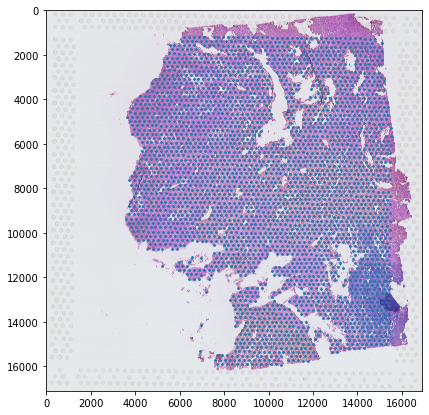

In [17]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(img_B2)
plt.scatter(x_B2,y_B2, s = 3)

## 2.3. C3

### 2.3.1. Pretreat AnnData.obs 

In [19]:
PanCN_C3_visium

AnnData object with n_obs × n_vars = 2364 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [20]:
PanCN_C3_visium.obs = PanCN_C3_visium.obs.reset_index()
PanCN_C3_visium.obs = PanCN_C3_visium.obs.rename(columns={"index": "probes"})
PanCN_C3_visium.obs

probes  in_tissue  array_row  array_col
0     AAACAAGTATCTCCCA-1          1         50        102
1     AAACAGCTTTCAGAAG-1          1         43          9
2     AAACATTTCCCGGATT-1          1         61         97
3     AAACCGGGTAGGTACC-1          1         42         28
4     AAACCGTTCGTCCAGG-1          1         52         42
...                  ...        ...        ...        ...
2359  TTGTGTATGCCACCAA-1          1         56         60
2360  TTGTTAGCAAATTCGA-1          1         22         42
2361  TTGTTCAGTGTGCTAC-1          1         24         64
2362  TTGTTGTGTGTCAAGA-1          1         31         77
2363  TTGTTTCCATACAACT-1          1         45         27

[2364 rows x 4 columns]

### 2.3.2. Pretreat tissue position df 

In [21]:
PanCN_C3_tissue_positions = PanCN_C3_tissue_positions.rename(columns={0: "probes"})
PanCN_C3_tissue_positions

probes  1   2    3      4      5
0     ACGCCTGACACGCGCT-1  0   0    0   1165   1710
1     TACCGATCCAACACTT-1  0   1    1   1356   1817
2     ATTAAAGCGGACGAGC-1  0   0    2   1167   1929
3     GATAAGGGACGATTAG-1  0   1    3   1359   2036
4     GTGCAAATCACCAATA-1  0   0    4   1169   2148
...                  ... ..  ..  ...    ...    ...
4987  GAACGTTTGTATCCAC-1  0  77  123  15996  15035
4988  ATTGAATTCCCTGTAG-1  0  76  124  15806  15146
4989  TACCTCACCAATTGTA-1  0  77  125  15998  15254
4990  AGTCGAATTAGCGTAA-1  0  76  126  15808  15366
4991  TTGAAGTGCATCTACA-1  0  77  127  16000  15473

[4992 rows x 6 columns]

### 2.3.3 Merged the two dataframe by common rows 

In [22]:
PanCN_C3_merged = pd.merge(PanCN_C3_visium.obs, PanCN_C3_tissue_positions, how='inner', on=['probes'])
PanCN_C3_merged

probes  in_tissue  array_row  array_col  1   2    3      4  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102  10821   
1     AAACAGCTTTCAGAAG-1          1         43          9  1  43    9   9377   
2     AAACATTTCCCGGATT-1          1         61         97  1  61   97  12913   
3     AAACCGGGTAGGTACC-1          1         42         28  1  42   28   9208   
4     AAACCGTTCGTCCAGG-1          1         52         42  1  52   42  11132   
...                  ...        ...        ...        ... ..  ..  ...    ...   
2359  TTGTGTATGCCACCAA-1          1         56         60  1  56   60  11916   
2360  TTGTTAGCAAATTCGA-1          1         22         42  1  22   42   5410   
2361  TTGTTCAGTGTGCTAC-1          1         24         64  1  24   64   5817   
2362  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77   7168   
2363  TTGTTTCCATACAACT-1          1         45         27  1  45   27   9779   

          5  
0     12788  
1      2608  
2     12217  
3      4693  
4      6207  
...     ...  
2359   8172  
2360   6268  
2361   8676  
2362  10087  
2363   4577  

[2364 rows x 9 columns]

In [23]:
y_C3 = list(PanCN_C3_merged[4])
x_C3 = list(PanCN_C3_merged[5])

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(img_C3)
plt.scatter(x_C3,y_C3, s = 4)

## 2.4. D4

### 2.4.1. Pretreat AnnData.obs 

In [24]:
PanCN_D4_visium

AnnData object with n_obs × n_vars = 2316 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [25]:
PanCN_D4_visium.obs = PanCN_D4_visium.obs.reset_index()
PanCN_D4_visium.obs = PanCN_D4_visium.obs.rename(columns={"index": "probes"})
PanCN_D4_visium.obs

probes  in_tissue  array_row  array_col
0     AAACAGAGCGACTCCT-1          1         14         94
1     AAACCGGGTAGGTACC-1          1         42         28
2     AAACCGTTCGTCCAGG-1          1         52         42
3     AAACGAAGAACATACC-1          1          6         64
4     AAACGAGACGGTTGAT-1          1         35         79
...                  ...        ...        ...        ...
2311  TTGTTCAGTGTGCTAC-1          1         24         64
2312  TTGTTGTGTGTCAAGA-1          1         31         77
2313  TTGTTTCACATCCAGG-1          1         58         42
2314  TTGTTTCCATACAACT-1          1         45         27
2315  TTGTTTGTGTAAATTC-1          1          7         51

[2316 rows x 4 columns]

### 2.4.2. Pretreat tissue position df 

In [26]:
PanCN_D4_tissue_positions = PanCN_D4_tissue_positions.rename(columns={0: "probes"})
PanCN_D4_tissue_positions

probes  1   2    3      4      5
0     ACGCCTGACACGCGCT-1  0   0    0   1132   1473
1     TACCGATCCAACACTT-1  0   1    1   1324   1581
2     ATTAAAGCGGACGAGC-1  0   0    2   1134   1693
3     GATAAGGGACGATTAG-1  0   1    3   1326   1800
4     GTGCAAATCACCAATA-1  0   0    4   1137   1912
...                  ... ..  ..  ...    ...    ...
4987  GAACGTTTGTATCCAC-1  0  77  123  15967  14801
4988  ATTGAATTCCCTGTAG-1  0  76  124  15777  14912
4989  TACCTCACCAATTGTA-1  0  77  125  15969  15020
4990  AGTCGAATTAGCGTAA-1  0  76  126  15779  15132
4991  TTGAAGTGCATCTACA-1  0  77  127  15971  15239

[4992 rows x 6 columns]

### 2.4.3 Merged the two dataframe by common rows 

In [27]:
PanCN_D4_merged = pd.merge(PanCN_D4_visium.obs, PanCN_D4_tissue_positions, how='inner', on=['probes'])
PanCN_D4_merged

probes  in_tissue  array_row  array_col  1   2   3      4  \
0     AAACAGAGCGACTCCT-1          1         14         94  1  14  94   3914   
1     AAACCGGGTAGGTACC-1          1         42         28  1  42  28   9177   
2     AAACCGTTCGTCCAGG-1          1         52         42  1  52  42  11102   
3     AAACGAAGAACATACC-1          1          6         64  1   6  64   2352   
4     AAACGAGACGGTTGAT-1          1         35         79  1  35  79   7902   
...                  ...        ...        ...        ... ..  ..  ..    ...   
2311  TTGTTCAGTGTGCTAC-1          1         24         64  1  24  64   5786   
2312  TTGTTGTGTGTCAAGA-1          1         31         77  1  31  77   7137   
2313  TTGTTTCACATCCAGG-1          1         58         42  1  58  42  12246   
2314  TTGTTTCCATACAACT-1          1         45         27  1  45  27   9749   
2315  TTGTTTGTGTAAATTC-1          1          7         51  1   7  51   2528   

          5  
0     11751  
1      4457  
2      5971  
3      8478  
4     10063  
...     ...  
2311   8441  
2312   9852  
2313   5959  
2314   4341  
2315   7050  

[2316 rows x 9 columns]

In [28]:
y_D4 = list(PanCN_D4_merged[4])
x_D4 = list(PanCN_D4_merged[5])

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(img_D4)
plt.scatter(x_D4,y_D4, s = 3)

# 3. Spot and nuclei superposition

In [32]:
PDAC_B2["Nuclei Area per object"]

0        22.50
1        56.25
2        18.50
3        13.25
4        18.50
         ...  
90948    28.75
90949    16.00
90950    12.00
90951    23.25
90952    67.00
Name: Nuclei Area per object, Length: 90953, dtype: float64

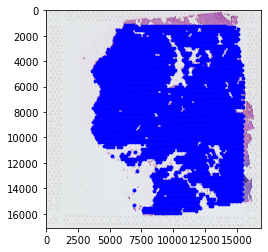

In [46]:
#fig = plt.figure(figsize=(10, 7))
plt.imshow(img_B2)
plt.scatter(x_B2,y_B2, s = 8, c = "b")
#plt.scatter(PDAC_B2_visio_x, PDAC_B2_visio_y, s = 1, c = "r")

In [ ]:
fig = plt.figure(figsize=(20, 15))
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(img_B2)
plt.scatter(x_B2,y_B2, s = 3, c = "b")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_B2)
plt.scatter(PDAC_B2_visio_x, PDAC_B2_visio_y, s = 1, c = "r")

# 3. Find size of the spots

In [ ]:
test = sc.read_h5("151673_filtered_feature_bc_matrix.h5")
test

In [ ]:
test = sq.read.visium("visium/151673")
test

conda create --name st_pharm  python=3.9

conda activate st_pharm

pip install ipykernel

python -m ipykernel install --user --name=st_pharm

pip install squidpy



pip install scanpy

pip install opencv-python

In [ ]:
import squidpy as sq

In [ ]:
scale_factor_spot_B2 = PDAC_B2_visium.uns["spatial"]["PDAC_ILS50185PT2"]["scalefactors"]["spot_diameter_fullres"]
scale_factor_spot_B2

In [ ]:
sq.pl.spatial_scatter(PDAC_B2_visium, img_key = None)

In [ ]:
sc.pl.spatial(PDAC_B2_visium, img_key= None)

In [ ]:
PDAC_B2_visium.uns

In [ ]:
PDAC_B2_visium.uns["spatial"]["PDAC_ILS50185PT2"]

In [39]:
142*0.11

15.62

In [40]:
142*0.035

4.970000000000001

In [41]:
142*0.11*0.5

7.81

In [42]:
142*0.035*0.5

2.4850000000000003

In [ ]:
import numpy as np

# Geopandas

In [ ]:
pip install geopandas

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:
PDAC_B2_merged

Create a pandas Geo series wich correspond to POINT(x,y) column : 

https://gis.stackexchange.com/questions/174159/converting-pandas-dataframe-to-geodataframe

In [ ]:
geometry = [Point(xy) for xy in zip(PDAC_B2_merged[4], PDAC_B2_merged[5])]
#df = df.drop(['Lon', 'Lat'], axis=1)
 # ,crs="EPSG:4326")

In [ ]:
gdf

In [72]:
test = gdf.copy()
test

probes  in_tissue  array_row  array_col  1   2    3      4  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102  10795   
1     AAACAATCTACTAGCA-1          1          3         43  1   3   43   1757   
2     AAACAGAGCGACTCCT-1          1         14         94  1  14   94   3916   
3     AAACATTTCCCGGATT-1          1         61         97  1  61   97  12889   
4     AAACCACTACACAGAT-1          1          3        117  1   3  117   1843   
...                  ...        ...        ...        ... ..  ..  ...    ...   
3080  TTGTTAGCAAATTCGA-1          1         22         42  1  22   42   5381   
3081  TTGTTCAGTGTGCTAC-1          1         24         64  1  24   64   5789   
3082  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77   7140   
3083  TTGTTTCCATACAACT-1          1         45         27  1  45   27   9753   
3084  TTGTTTGTGTAAATTC-1          1          7         51  1   7   51   2529   

          5                     geometry  
0     12691  POINT (10795.000 12691.000)  
1      6316    POINT (1757.000 6316.000)  
2     11887   POINT (3916.000 11887.000)  
3     12120  POINT (12889.000 12120.000)  
4     14432   POINT (1843.000 14432.000)  
...     ...                          ...  
3080   6168    POINT (5381.000 6168.000)  
3081   8577    POINT (5789.000 8577.000)  
3082   9988    POINT (7140.000 9988.000)  
3083   4476    POINT (9753.000 4476.000)  
3084   7186    POINT (2529.000 7186.000)  

[3085 rows x 10 columns]

In [78]:
coord_x = list(test[4])
coord_y = list(test[5])

In [90]:
#x_new = [x * -1 for x in coord_x]
y_new = [x * -1 for x in coord_y]

In [ ]:
x,y = zip(*(test[], test["5"]).tolist())

In [91]:
test["new_x"] = x_new
test["new_y"] = y_new

In [98]:
geometry = [Point(xy) for xy in zip(test[4], test["new_y"])]
gdf_2 = GeoDataFrame(test, geometry=geometry)

<AxesSubplot:>

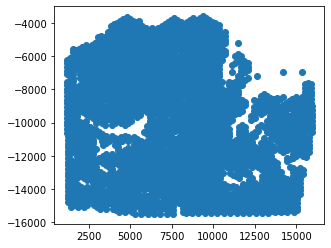

In [99]:
gdf_2.plot()

In [ ]:
test = gdf.copy()
x_A1,y_A1 = zip(*np_coord_A1.tolist())
x_new = [x * 2 for x in x_A1]
y_new = [x * -2 for x in y_A1]
PDAC_A1_df["new_x"] = x_A1_new
PDAC_A1_df["new_y"] = y_A1_new

<AxesSubplot:>

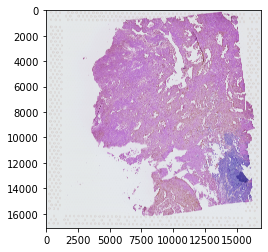

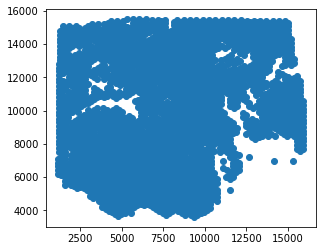

In [71]:
plt.imshow(img_B2)
gdf.plot()

In [ ]:
new_df = gdf.copy()
new_df['geometry'] = new_df['geometry'].buffer(0.0000001)
new_df['geometry']

In [94]:
img_B2.shape

(17107, 16907, 3)

<AxesSubplot:>

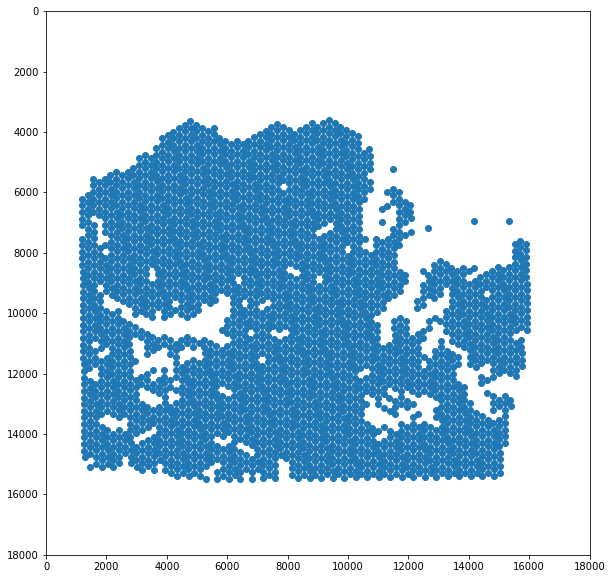

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,18000)
ax.set_ylim(18000,0)
gdf.plot(ax=ax)

In [111]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc

In [ ]:
num = 1000
sizes = 50 * np.random.random(num)
xy = 10 * np.random.random((num, 2))


In [123]:
test_size = PDAC_B2["Nuclei Area per object"].to_numpy()

In [178]:
coords = np.column_stack((PDAC_B2_merged[5], PDAC_B2_merged[4]))
coords

array([[12691, 10795],
       [ 6316,  1757],
       [11887,  3916],
       ...,
       [ 9988,  7140],
       [ 4476,  9753],
       [ 7186,  2529]])

In [164]:
col = len(PDAC_B2_merged[4])
table = list("2.0"*col)
table = np.column_stack(table)

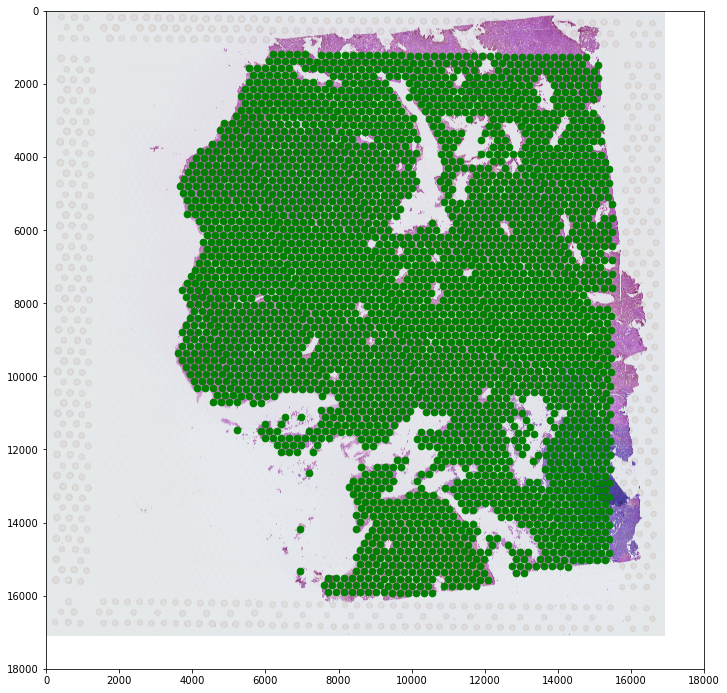

In [188]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

#size = 2


fig, ax = plt.subplots()
patches = [plt.Circle(center) for center in zip(coords)]
collection = mc.CircleCollection([35], offsets=coords, transOffset=ax.transData, color='green')
ax.add_collection(collection)
ax.set_xlim(0,18000)
ax.set_ylim(18000,0)
#ax.margins(0.1)
plt.imshow(img_B2)
plt.show()

In [189]:
collection

In [168]:
patches

 ...]

# Test with radius

In [16]:
def isInside(circle_x, circle_y, rad, x, y):
     
    # Compare radius of circle
    # with distance of its center
    # from given point
    if ((x - circle_x) * (x - circle_x) +
        (y - circle_y) * (y - circle_y) <= rad * rad):
        return True;
    else:
        return False;

In [18]:
PDAC_B2_visio = PDAC_B2.drop(columns = ["Unnamed: 0","Name","Total Nuclei (#)"])
PDAC_B2_visio

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                       22.50     13221.945991     148.265762      123.238940   
1                       56.25     13221.945991     229.297897      180.612488   
2                       18.50     13221.945991     219.379120      164.964777   
3                       13.25     13221.945991     209.646164      152.203821   
4                       18.50     13221.945991     246.869537      169.691705   
...                       ...              ...            ...             ...   
90948                   28.75     13221.945991     231.892365      220.709386   
90949                   16.00     13221.945991     229.378082      220.169842   
90950                   12.00     13221.945991     233.848938      229.316310   
90951                   23.25     13221.945991     237.114182      222.590399   
90952                   67.00     13221.945991     245.298767      226.371344   

       Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0          97.844582  111.745285        1.554312e-15         2.201911   
1         138.413345  158.885101        1.733108e-01         2.203774   
2          98.549644  117.509422        1.757970e-01         9.646840   
3         107.101357  145.107941        7.963259e-01        10.012107   
4          99.229431  134.526611        2.588855e-01         9.693675   
...              ...         ...                 ...              ...   
90948     206.059235  222.745132        4.682526e-01         9.493017   
90949     210.485458  222.745132        4.835029e-01         9.595284   
90950     224.627930  228.608246        4.520148e-01         2.219367   
90951     213.934448  217.349335        2.528394e-01         2.203606   
90952     197.651382  236.230515        3.240433e-01         8.474137   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0                0.847026                 0.000000            0.847026   
1                1.682064                29.911218            1.390544   
2             1512.508475               110.905018         1246.614048   
3             5461.165999                 1.543453         1112.298000   
4             1467.966275               152.599960         1087.931141   
...                   ...                      ...                 ...   
90948         2010.231802               143.182735         1068.935604   
90949         1517.902684                11.260859          783.992336   
90950           11.426497                35.967781            6.261552   
90951            1.865767                39.153546            1.394027   
90952          676.878643               150.615577          457.540673   

          Center X     Center Y        new_x         new_y  
0     -1097.844444  3807.416667  6258.311111    939.166667  
1     -1116.802222  3806.620000  6220.395556    940.760000  
2      -912.635135  3817.364865  6628.729730    919.270270  
3      -972.103774  3816.452830  6509.792453    921.094340  
4      -965.398649  3814.871622  6523.202703    924.256757  
...            ...          ...          ...           ...  
90948  -611.900000 -3826.560870  7230.200000  16207.121739  
90949  -512.250000 -3829.585938  7429.500000  16213.171875  
90950  -455.843750 -3819.947917  7542.312500  16193.895833  
90951  -460.446237 -3821.564516  7533.107527  16197.129032  
90952  -446.585821 -3826.733209  7560.828358  16207.466418  

[90953 rows x 15 columns]

In [143]:
test = PDAC_B2_visio.loc[(PDAC_B2_visio['new_x'] == 6258.311111111111) & (PDAC_B2_visio['new_y'] == 939.1666666666688)]
len(test)

1

In [189]:
len(PDAC_B2_visio)

90953

In [21]:
rad = 100
idx_to_drop = []
x_ST_list = []
y_ST_list = []

for x,y in zip(PDAC_B2_visio_x, PDAC_B2_visio_y):
    for circle_x, circle_y in zip(x_B2, y_B2):
        if(isInside(circle_x, circle_y, rad, x, y)):
            msk = PDAC_B2_visio['new_x'].eq(x) & (PDAC_B2_visio['new_y'].eq(y))
            idx_to_drop.append(PDAC_B2_visio.index[msk])
            x_ST_list.append(circle_x)
            y_ST_list.append(circle_y)

In [22]:
new_idx = [x for idx in idx_to_drop for x in idx]
df_collect_morpho = PDAC_B2_visio.drop(new_idx)
len(df_collect_morpho)

30151

In [23]:
df_1notin2 = PDAC_B2_visio[~PDAC_B2_visio.isin(df_collect_morpho).all(axis=1)]

In [26]:
len(df_1notin2)

60802

In [24]:
df_1notin2.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
1289                   22.25     13221.945991     193.240265      120.532822   
1290                   17.75     13221.945991     209.419449      186.491113   
1291                   11.50     13221.945991     137.075073       76.332843   
1292                   16.25     13221.945991     209.998795      170.169276   
1294                   11.50     13221.945991     166.034744      124.375363   

      Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
1289      59.020184   60.215824            0.317381         9.880908   
1290     159.017990  164.474457            0.564140         9.446083   
1291      31.046024   33.054367            0.376380        10.871899   
1292     136.141129  171.019272            0.528512         9.808763   
1294      87.011292   89.100708            0.325153        10.192424   

      Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
1289         4020.064713               139.833811         2744.173801   
1290         1587.304761               168.614217          691.843371   
1291         7352.839549                88.312431         4585.377721   
1292         2643.976730               168.500931         1246.603307   
1294         3790.516114               162.907931         2558.016604   

         Center X     Center Y        new_x        new_y  
1289 -1123.573034  3712.264045  6206.853933  1129.471910  
1290 -1145.338028  3710.957746  6163.323944  1132.084507  
1291 -1124.630435  3688.847826  6204.739130  1176.304348  
1292 -1167.684615  3689.153846  6118.630769  1175.692308  
1294 -1168.793478  3676.771739  6116.413043  1200.456522

In [25]:
df_1notin2["x_spot"] = x_ST_list
df_1notin2["y_spot"] = y_ST_list
df_1notin2

/tmp/ipykernel_77/397085143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_spot"] = x_ST_list
/tmp/ipykernel_77/397085143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_spot"] = y_ST_list


Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
1289                    22.25     13221.945991     193.240265      120.532822   
1290                    17.75     13221.945991     209.419449      186.491113   
1291                    11.50     13221.945991     137.075073       76.332843   
1292                    16.25     13221.945991     209.998795      170.169276   
1294                    11.50     13221.945991     166.034744      124.375363   
...                       ...              ...            ...             ...   
90929                   12.50     13221.945991     196.511002      149.305486   
90930                   39.25     13221.945991     213.738831      131.257080   
90932                   11.25     13221.945991     187.891785      145.989009   
90934                   27.50     13221.945991     208.866852      159.070618   
90943                   22.75     13221.945991     149.314468       92.383707   

       Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
1289       59.020184   60.215824            0.317381         9.880908   
1290      159.017990  164.474457            0.564140         9.446083   
1291       31.046024   33.054367            0.376380        10.871899   
1292      136.141129  171.019272            0.528512         9.808763   
1294       87.011292   89.100708            0.325153        10.192424   
...              ...         ...                 ...              ...   
90929      98.004021  196.057236            0.343782        10.084731   
90930      40.239162   46.544975            0.582418         9.351922   
90932      97.751526   97.817261            0.574971        10.211427   
90934      94.674179  146.092041            0.501696         9.209838   
90943      42.832638   58.165005            0.549028         9.690881   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
1289          4020.064713               139.833811         2744.173801   
1290          1587.304761               168.614217          691.843371   
1291          7352.839549                88.312431         4585.377721   
1292          2643.976730               168.500931         1246.603307   
1294          3790.516114               162.907931         2558.016604   
...                   ...                      ...                 ...   
90929         2876.860747               136.046126         1887.848146   
90930         2006.736393               172.585818          837.977869   
90932         3648.294630               147.784954         1550.630370   
90934         1051.795585               113.001557          524.113542   
90943         2417.213134               175.143364         1090.096621   

          Center X     Center Y         new_x         new_y  x_spot  y_spot  
1289  -1123.573034  3712.264045   6206.853933   1129.471910    6213    1183  
1290  -1145.338028  3710.957746   6163.323944   1132.084507    6213    1183  
1291  -1124.630435  3688.847826   6204.739130   1176.304348    6213    1183  
1292  -1167.684615  3689.153846   6118.630769   1175.692308    6213    1183  
1294  -1168.793478  3676.771739   6116.413043   1200.456522    6213    1183  
...            ...          ...           ...           ...     ...     ...  
90929  1448.680000 -3627.630000  11351.360000  15809.260000   11322   15743  
90930  1508.232484 -3629.028662  11470.464968  15812.057325   11541   15745  
90932  1459.311111 -3628.855556  11372.622222  15811.711111   11322   15743  
90934  1439.495455 -3635.895455  11332.990909  15825.790909   11322   15743  
90943  1623.456044 -3614.752747  11700.912088  15783.505495   11761   15748  

[60802 rows x 17 columns]

# Mean of morphological features for all the cells in each spot

In [ ]:
cols = ['x_spot','y_spot']

grouped = df_1notin2.groupby(((df_1notin2[cols].shift() != df_1notin2[cols]).any(axis=1)).cumsum())
for k, v in grouped:
    print(f'[group {k}]')
    print(v)


[group 1]
      Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
1289                   22.25     13221.945991     193.240265      120.532822   
1290                   17.75     13221.945991     209.419449      186.491113   
1291                   11.50     13221.945991     137.075073       76.332843   
1292                   16.25     13221.945991     209.998795      170.169276   
1294                   11.50     13221.945991     166.034744      124.375363   
1297                   28.00     13221.945991     229.856308      154.537013   
1298                   15.50     13221.945991     185.957199       93.015308   
1303                   20.25     13221.945991     223.815598      181.475917   

      Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
1289      59.020184   60.215824            0.317381         9.880908   
1290     159.017990  164.474457            0.564140         9.446083   
1291      31.046024   33.054367            0.376380  

In [41]:
df_1notin2.columns

Index(['Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis', 'Center X', 'Center Y', 'new_x', 'new_y',
       'x_spot', 'y_spot'],
      dtype='object')

In [43]:
df_1notin2.groupby(['x_spot','y_spot']).size()

x_spot  y_spot
3602    9362      18
3651    4782      13
3710    9554      24
3714    9172      14
3718    8791      25
                  ..
15476   6817      21
15480   6435      22
15484   6054      20
15488   5672      16
15492   5290      16
Length: 3074, dtype: int64

In [26]:
df_1notin2.groupby(['x_spot','y_spot'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',
                                        'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
                                        'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
                                        'Texture Minor Axis'].mean()


/tmp/ipykernel_77/628858154.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1notin2.groupby(['x_spot','y_spot'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',


Nuclei Area per object  Texture inertia  Max Intensity  \
x_spot y_spot                                                           
3602   9362                 30.236111     13221.945991     227.707089   
3651   4782                 32.961538     13221.945991     201.842682   
3710   9554                 21.677083     13221.945991     190.165948   
3714   9172                 31.964286     13221.945991     210.225343   
3718   8791                 33.950000     13221.945991     208.585428   
...                               ...              ...            ...   
15476  6817                 48.642857     13221.945991     182.528323   
15480  6435                 50.386364     13221.945991     177.068635   
15484  6054                 19.475000     13221.945991     193.854798   
15488  5672                 23.156250     13221.945991     195.033786   
15492  5290                 44.390625     13221.945991     196.360796   

               Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
x_spot y_spot                                                                  
3602   9362        176.673514     121.531458  162.225101            0.426603   
3651   4782        144.134368      87.438891  121.887183            0.388484   
3710   9554        119.786088      58.308691   92.948138            0.282616   
3714   9172        155.777855     100.506435  136.430556            0.374938   
3718   8791        146.589252      90.715970  117.983233            0.244252   
...                       ...            ...         ...                 ...   
15476  6817        130.917143      79.600153  108.055362            0.371766   
15480  6435        120.222601      68.876403  101.710808            0.382051   
15484  6054        134.606505      83.820861  108.320159            0.452677   
15488  5672        126.024362      68.811833   91.981105            0.425349   
15492  5290        122.711968      59.150398   88.423412            0.398263   

               Texture Entropy  Texture Major Axis  Texture Major Direction  \
x_spot y_spot                                                                 
3602   9362           9.259424         1447.104200                50.064284   
3651   4782           9.382739         1884.829578               113.534537   
3710   9554           8.271825         2235.163168                70.231980   
3714   9172           8.387209         1711.317718                80.367970   
3718   8791           7.380604         1071.334818                48.386623   
...                        ...                 ...                      ...   
15476  6817           9.060731         1390.885762                86.223247   
15480  6435           9.203239         1607.696168                74.782707   
15484  6054           9.886661         3454.346566               114.861797   
15488  5672           9.771206         2975.969736                87.629148   
15492  5290           9.380186         2340.335597               114.869693   

               Texture Minor Axis  
x_spot y_spot                      
3602   9362            727.543910  
3651   4782           1143.155943  
3710   9554           1411.483969  
3714   9172            915.382170  
3718   8791            730.561652  
...                           ...  
15476  6817            783.122697  
15480  6435            923.484123  
15484  6054           1797.442751  
15488  5672           1598.624191  
15492  5290           1244.631306  

[3074 rows x 11 columns]

In [27]:
df_mean_B2 = df_1notin2.groupby(['x_spot','y_spot'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',
                                        'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
                                        'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
                                        'Texture Minor Axis'].mean()

/tmp/ipykernel_77/3087948929.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean_B2 = df_1notin2.groupby(['x_spot','y_spot'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',


In [50]:
type(df_mean_B2)

pandas.core.frame.DataFrame

# Merged with count

## Merged coord df with morpho df

In [42]:
df_mean_B2

Nuclei Area per object  Texture inertia  Max Intensity  \
x_spot y_spot                                                           
3602   9362                 30.236111     13221.945991     227.707089   
3651   4782                 32.961538     13221.945991     201.842682   
3710   9554                 21.677083     13221.945991     190.165948   
3714   9172                 31.964286     13221.945991     210.225343   
3718   8791                 33.950000     13221.945991     208.585428   
...                               ...              ...            ...   
15476  6817                 48.642857     13221.945991     182.528323   
15480  6435                 50.386364     13221.945991     177.068635   
15484  6054                 19.475000     13221.945991     193.854798   
15488  5672                 23.156250     13221.945991     195.033786   
15492  5290                 44.390625     13221.945991     196.360796   

               Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
x_spot y_spot                                                                  
3602   9362        176.673514     121.531458  162.225101            0.426603   
3651   4782        144.134368      87.438891  121.887183            0.388484   
3710   9554        119.786088      58.308691   92.948138            0.282616   
3714   9172        155.777855     100.506435  136.430556            0.374938   
3718   8791        146.589252      90.715970  117.983233            0.244252   
...                       ...            ...         ...                 ...   
15476  6817        130.917143      79.600153  108.055362            0.371766   
15480  6435        120.222601      68.876403  101.710808            0.382051   
15484  6054        134.606505      83.820861  108.320159            0.452677   
15488  5672        126.024362      68.811833   91.981105            0.425349   
15492  5290        122.711968      59.150398   88.423412            0.398263   

               Texture Entropy  Texture Major Axis  Texture Major Direction  \
x_spot y_spot                                                                 
3602   9362           9.259424         1447.104200                50.064284   
3651   4782           9.382739         1884.829578               113.534537   
3710   9554           8.271825         2235.163168                70.231980   
3714   9172           8.387209         1711.317718                80.367970   
3718   8791           7.380604         1071.334818                48.386623   
...                        ...                 ...                      ...   
15476  6817           9.060731         1390.885762                86.223247   
15480  6435           9.203239         1607.696168                74.782707   
15484  6054           9.886661         3454.346566               114.861797   
15488  5672           9.771206         2975.969736                87.629148   
15492  5290           9.380186         2340.335597               114.869693   

               Texture Minor Axis  
x_spot y_spot                      
3602   9362            727.543910  
3651   4782           1143.155943  
3710   9554           1411.483969  
3714   9172            915.382170  
3718   8791            730.561652  
...                           ...  
15476  6817            783.122697  
15480  6435            923.484123  
15484  6054           1797.442751  
15488  5672           1598.624191  
15492  5290           1244.631306  

[3074 rows x 11 columns]

In [35]:
df_mean_B2_wo_index = df_mean_B2.rename_axis(['x_coord', 'y_coord']).reset_index()
df_mean_B2_wo_index.head()

x_coord  y_coord  Nuclei Area per object  Texture inertia  Max Intensity  \
0     3602     9362               30.236111     13221.945991     227.707089   
1     3651     4782               32.961538     13221.945991     201.842682   
2     3710     9554               21.677083     13221.945991     190.165948   
3     3714     9172               31.964286     13221.945991     210.225343   
4     3718     8791               33.950000     13221.945991     208.585428   

   Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
0      176.673514     121.531458  162.225101            0.426603   
1      144.134368      87.438891  121.887183            0.388484   
2      119.786088      58.308691   92.948138            0.282616   
3      155.777855     100.506435  136.430556            0.374938   
4      146.589252      90.715970  117.983233            0.244252   

   Texture Entropy  Texture Major Axis  Texture Major Direction  \
0         9.259424         1447.104200                50.064284   
1         9.382739         1884.829578               113.534537   
2         8.271825         2235.163168                70.231980   
3         8.387209         1711.317718                80.367970   
4         7.380604         1071.334818                48.386623   

   Texture Minor Axis  
0          727.543910  
1         1143.155943  
2         1411.483969  
3          915.382170  
4          730.561652

In [37]:
coord = pd.DataFrame(PDAC_B2_visium.obsm['spatial'], columns=['x_coord', 'y_coord'], index=PDAC_B2_visium.obs_names)
coord

x_coord  y_coord
0       12691    10795
1        6316     1757
2       11887     3916
3       12120    12889
4       14432     1843
...       ...      ...
3080     6168     5381
3081     8577     5789
3082     9988     7140
3083     4476     9753
3084     7186     2529

[3085 rows x 2 columns]

In [39]:
merged_coord = pd.merge(coord, df_mean_B2_wo_index, on= ["x_coord", "y_coord"], how="left")
merged_coord

x_coord  y_coord  Nuclei Area per object  Texture inertia  \
0       12691    10795               26.772727     13221.945991   
1        6316     1757               22.605769     13221.945991   
2       11887     3916               37.930556     13221.945991   
3       12120    12889               28.400000     13221.945991   
4       14432     1843               23.791667     13221.945991   
...       ...      ...                     ...              ...   
3080     6168     5381               33.812500     13221.945991   
3081     8577     5789               22.442308     13221.945991   
3082     9988     7140               40.939655     13221.945991   
3083     4476     9753               22.578125     13221.945991   
3084     7186     2529               22.250000     13221.945991   

      Max Intensity  Mean Intensity  Min Intensity       Modus  \
0        227.365064      156.143724      84.621260  142.729983   
1        206.855333      129.338503      58.000358   84.991074   
2        190.324839      130.884548      79.340589  109.807706   
3        233.962613      174.686055     123.116943  173.109213   
4        190.384893      123.604139      63.887469   91.587114   
...             ...             ...            ...         ...   
3080     211.744955      155.003026      86.752410  126.411348   
3081     201.670323      131.691768      68.476800   90.520827   
3082     193.221473      117.478955      57.500727   88.825386   
3083     176.437632      125.781254      78.970785   94.689810   
3084     234.777306      162.569272      73.976202  153.880120   

      Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0               0.300971         9.577419         1997.535199   
1               0.389471         7.726838         2922.368815   
2               0.346514         9.186221         1497.637702   
3               0.238662         7.879097         1162.782273   
4               0.290855         8.566895         2671.048212   
...                  ...              ...                 ...   
3080            0.438109         9.358967         1683.338596   
3081            0.438715         9.844930         3018.840769   
3082            0.276259         6.831569         1272.415357   
3083            0.304511         9.684581         2125.773511   
3084            0.370722         9.933266         3177.977243   

      Texture Major Direction  Texture Minor Axis  
0                   84.036769         1381.947086  
1                   75.252427         1574.278562  
2                   66.687268          960.227146  
3                   68.257293          806.416896  
4                   87.080179         1783.096021  
...                       ...                 ...  
3080                58.325568          991.077241  
3081                56.760281         1677.637392  
3082                82.973779          759.283783  
3083                73.038197         1487.954198  
3084                95.624554         1934.538896  

[3085 rows x 13 columns]

In [41]:
merged_coord.isna().sum()

x_coord                     0
y_coord                     0
Nuclei Area per object     11
Texture inertia            11
Max Intensity              11
Mean Intensity             11
Min Intensity              11
Modus                      11
Texture Anisotropy         11
Texture Entropy            11
Texture Major Axis         11
Texture Major Direction    11
Texture Minor Axis         11
dtype: int64

## Merged morpho/coord df with counts df

In [28]:
counts = pd.DataFrame(PDAC_B2_visium.X.todense(), columns=PDAC_B2_visium.var_names, index=PDAC_B2_visium.obs_names)
counts

SAMD11  NOC2L  KLHL17  PLEKHN1  PERM1  HES4  ISG15  AGRN  RNF223  \
0        0.0    0.0     0.0      0.0    0.0   1.0    0.0   0.0     0.0   
1        0.0    0.0     0.0      1.0    0.0   1.0    0.0   0.0     0.0   
2        0.0    1.0     0.0      0.0    0.0   1.0    0.0   1.0     0.0   
3        0.0    0.0     0.0      0.0    0.0   0.0    0.0   1.0     0.0   
4        0.0    0.0     0.0      1.0    0.0   0.0    1.0   3.0     0.0   
...      ...    ...     ...      ...    ...   ...    ...   ...     ...   
3080     0.0    0.0     0.0      0.0    0.0   0.0    0.0   0.0     0.0   
3081     0.0    1.0     0.0      0.0    0.0   0.0    3.0   0.0     0.0   
3082     0.0    1.0     0.0      1.0    0.0   2.0    0.0   7.0     0.0   
3083     0.0    0.0     0.0      0.0    0.0   0.0    0.0   0.0     0.0   
3084     0.0    0.0     0.0      0.0    0.0   0.0    0.0   3.0     0.0   

      C1orf159  ...  SRY  ZFY  PCDH11Y  AMELY  TBL1Y  TSPY1  USP9Y  DDX3Y  \
0          0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
1          0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
4          1.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
...        ...  ...  ...  ...      ...    ...    ...    ...    ...    ...   
3080       1.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
3081       0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
3082       0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
3083       0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   
3084       0.0  ...  0.0  0.0      0.0    0.0    0.0    0.0    0.0    0.0   

      TMSB4Y  KDM5D  
0        0.0    0.0  
1        0.0    0.0  
2        0.0    0.0  
3        0.0    0.0  
4        0.0    0.0  
...      ...    ...  
3080     0.0    0.0  
3081     0.0    0.0  
3082     0.0    0.0  
3083     0.0    0.0  
3084     0.0    0.0  

[3085 rows x 17943 columns]

In [47]:
PDAC_B2_visium.obs_names

RangeIndex(start=0, stop=3085, step=1)

In [48]:
PDAC_B2_visium = sc.read_visium("./visium/PDAC_B2/")

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [49]:
counts_2 = pd.DataFrame(PDAC_B2_visium.X.todense(), columns=PDAC_B2_visium.var_names, index=PDAC_B2_visium.obs_names)
counts_2

SAMD11  NOC2L  KLHL17  PLEKHN1  PERM1  HES4  ISG15  AGRN  \
AAACAAGTATCTCCCA-1     0.0    0.0     0.0      0.0    0.0   1.0    0.0   0.0   
AAACAATCTACTAGCA-1     0.0    0.0     0.0      1.0    0.0   1.0    0.0   0.0   
AAACAGAGCGACTCCT-1     0.0    1.0     0.0      0.0    0.0   1.0    0.0   1.0   
AAACATTTCCCGGATT-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   1.0   
AAACCACTACACAGAT-1     0.0    0.0     0.0      1.0    0.0   0.0    1.0   3.0   
...                    ...    ...     ...      ...    ...   ...    ...   ...   
TTGTTAGCAAATTCGA-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   0.0   
TTGTTCAGTGTGCTAC-1     0.0    1.0     0.0      0.0    0.0   0.0    3.0   0.0   
TTGTTGTGTGTCAAGA-1     0.0    1.0     0.0      1.0    0.0   2.0    0.0   7.0   
TTGTTTCCATACAACT-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   0.0   
TTGTTTGTGTAAATTC-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   3.0   

                    RNF223  C1orf159  ...  SRY  ZFY  PCDH11Y  AMELY  TBL1Y  \
AAACAAGTATCTCCCA-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
AAACAATCTACTAGCA-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
AAACAGAGCGACTCCT-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
AAACATTTCCCGGATT-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
AAACCACTACACAGAT-1     0.0       1.0  ...  0.0  0.0      0.0    0.0    0.0   
...                    ...       ...  ...  ...  ...      ...    ...    ...   
TTGTTAGCAAATTCGA-1     0.0       1.0  ...  0.0  0.0      0.0    0.0    0.0   
TTGTTCAGTGTGCTAC-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
TTGTTGTGTGTCAAGA-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
TTGTTTCCATACAACT-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   
TTGTTTGTGTAAATTC-1     0.0       0.0  ...  0.0  0.0      0.0    0.0    0.0   

                    TSPY1  USP9Y  DDX3Y  TMSB4Y  KDM5D  
AAACAAGTATCTCCCA-1    0.0    0.0    0.0     0.0    0.0  
AAACAATCTACTAGCA-1    0.0    0.0    0.0     0.0    0.0  
AAACAGAGCGACTCCT-1    0.0    0.0    0.0     0.0    0.0  
AAACATTTCCCGGATT-1    0.0    0.0    0.0     0.0    0.0  
AAACCACTACACAGAT-1    0.0    0.0    0.0     0.0    0.0  
...                   ...    ...    ...     ...    ...  
TTGTTAGCAAATTCGA-1    0.0    0.0    0.0     0.0    0.0  
TTGTTCAGTGTGCTAC-1    0.0    0.0    0.0     0.0    0.0  
TTGTTGTGTGTCAAGA-1    0.0    0.0    0.0     0.0    0.0  
TTGTTTCCATACAACT-1    0.0    0.0    0.0     0.0    0.0  
TTGTTTGTGTAAATTC-1    0.0    0.0    0.0     0.0    0.0  

[3085 rows x 17943 columns]

In [52]:
PDAC_B2_visium.obs_names

Index(['AAACAAGTATCTCCCA-1', 'AAACAATCTACTAGCA-1', 'AAACAGAGCGACTCCT-1',
       'AAACATTTCCCGGATT-1', 'AAACCACTACACAGAT-1', 'AAACCCGAACGAAATC-1',
       'AAACCGGAAATGTTAA-1', 'AAACCGGGTAGGTACC-1', 'AAACCTAAGCAGCCGG-1',
       'AAACGAAGAACATACC-1',
       ...
       'TTGTGGCCCTGACAGT-1', 'TTGTGGTAGGAGGGAT-1', 'TTGTGGTATAGGTATG-1',
       'TTGTGGTGGTACTAAG-1', 'TTGTGTTTCCCGAAAG-1', 'TTGTTAGCAAATTCGA-1',
       'TTGTTCAGTGTGCTAC-1', 'TTGTTGTGTGTCAAGA-1', 'TTGTTTCCATACAACT-1',
       'TTGTTTGTGTAAATTC-1'],
      dtype='object', length=3085)

In [56]:
PDAC_B2_merged = PDAC_B2_merged.rename(columns={4: "y_coord", 5: "x_coord"})
PDAC_B2_merged

probes  in_tissue  array_row  array_col  1   2    3  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102   
1     AAACAATCTACTAGCA-1          1          3         43  1   3   43   
2     AAACAGAGCGACTCCT-1          1         14         94  1  14   94   
3     AAACATTTCCCGGATT-1          1         61         97  1  61   97   
4     AAACCACTACACAGAT-1          1          3        117  1   3  117   
...                  ...        ...        ...        ... ..  ..  ...   
3080  TTGTTAGCAAATTCGA-1          1         22         42  1  22   42   
3081  TTGTTCAGTGTGCTAC-1          1         24         64  1  24   64   
3082  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77   
3083  TTGTTTCCATACAACT-1          1         45         27  1  45   27   
3084  TTGTTTGTGTAAATTC-1          1          7         51  1   7   51   

      y_coord  x_coord  
0       10795    12691  
1        1757     6316  
2        3916    11887  
3       12889    12120  
4        1843    14432  
...       ...      ...  
3080     5381     6168  
3081     5789     8577  
3082     7140     9988  
3083     9753     4476  
3084     2529     7186  

[3085 rows x 9 columns]

In [57]:
merged_probes = pd.merge(PDAC_B2_merged, merged_coord, on= ["x_coord", "y_coord"], how="left")
merged_probes

probes  in_tissue  array_row  array_col  1   2    3  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102   
1     AAACAATCTACTAGCA-1          1          3         43  1   3   43   
2     AAACAGAGCGACTCCT-1          1         14         94  1  14   94   
3     AAACATTTCCCGGATT-1          1         61         97  1  61   97   
4     AAACCACTACACAGAT-1          1          3        117  1   3  117   
...                  ...        ...        ...        ... ..  ..  ...   
3080  TTGTTAGCAAATTCGA-1          1         22         42  1  22   42   
3081  TTGTTCAGTGTGCTAC-1          1         24         64  1  24   64   
3082  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77   
3083  TTGTTTCCATACAACT-1          1         45         27  1  45   27   
3084  TTGTTTGTGTAAATTC-1          1          7         51  1   7   51   

      y_coord  x_coord  Nuclei Area per object  Texture inertia  \
0       10795    12691               26.772727     13221.945991   
1        1757     6316               22.605769     13221.945991   
2        3916    11887               37.930556     13221.945991   
3       12889    12120               28.400000     13221.945991   
4        1843    14432               23.791667     13221.945991   
...       ...      ...                     ...              ...   
3080     5381     6168               33.812500     13221.945991   
3081     5789     8577               22.442308     13221.945991   
3082     7140     9988               40.939655     13221.945991   
3083     9753     4476               22.578125     13221.945991   
3084     2529     7186               22.250000     13221.945991   

      Max Intensity  Mean Intensity  Min Intensity       Modus  \
0        227.365064      156.143724      84.621260  142.729983   
1        206.855333      129.338503      58.000358   84.991074   
2        190.324839      130.884548      79.340589  109.807706   
3        233.962613      174.686055     123.116943  173.109213   
4        190.384893      123.604139      63.887469   91.587114   
...             ...             ...            ...         ...   
3080     211.744955      155.003026      86.752410  126.411348   
3081     201.670323      131.691768      68.476800   90.520827   
3082     193.221473      117.478955      57.500727   88.825386   
3083     176.437632      125.781254      78.970785   94.689810   
3084     234.777306      162.569272      73.976202  153.880120   

      Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0               0.300971         9.577419         1997.535199   
1               0.389471         7.726838         2922.368815   
2               0.346514         9.186221         1497.637702   
3               0.238662         7.879097         1162.782273   
4               0.290855         8.566895         2671.048212   
...                  ...              ...                 ...   
3080            0.438109         9.358967         1683.338596   
3081            0.438715         9.844930         3018.840769   
3082            0.276259         6.831569         1272.415357   
3083            0.304511         9.684581         2125.773511   
3084            0.370722         9.933266         3177.977243   

      Texture Major Direction  Texture Minor Axis  
0                   84.036769         1381.947086  
1                   75.252427         1574.278562  
2                   66.687268          960.227146  
3                   68.257293          806.416896  
4                   87.080179         1783.096021  
...                       ...                 ...  
3080                58.325568          991.077241  
3081                56.760281         1677.637392  
3082                82.973779          759.283783  
3083                73.038197         1487.954198  
3084                95.624554         1934.538896  

[3085 rows x 20 columns]

In [58]:
merged_probes.isna().sum()

probes                      0
in_tissue                   0
array_row                   0
array_col                   0
1                           0
2                           0
3                           0
y_coord                     0
x_coord                     0
Nuclei Area per object     11
Texture inertia            11
Max Intensity              11
Mean Intensity             11
Min Intensity              11
Modus                      11
Texture Anisotropy         11
Texture Entropy            11
Texture Major Axis         11
Texture Major Direction    11
Texture Minor Axis         11
dtype: int64

In [61]:
list(merged_probes.columns)

['probes',
 'in_tissue',
 'array_row',
 'array_col',
 1,
 2,
 3,
 'y_coord',
 'x_coord',
 'Nuclei Area per object',
 'Texture inertia',
 'Max Intensity',
 'Mean Intensity',
 'Min Intensity',
 'Modus',
 'Texture Anisotropy',
 'Texture Entropy',
 'Texture Major Axis',
 'Texture Major Direction',
 'Texture Minor Axis']

In [63]:
merged_probes_clean = merged_probes.drop(['in_tissue', 'array_row', 'array_col', 1,2,3, 'y_coord', 'x_coord'], axis=1)
merged_probes_clean

probes  Nuclei Area per object  Texture inertia  \
0     AAACAAGTATCTCCCA-1               26.772727     13221.945991   
1     AAACAATCTACTAGCA-1               22.605769     13221.945991   
2     AAACAGAGCGACTCCT-1               37.930556     13221.945991   
3     AAACATTTCCCGGATT-1               28.400000     13221.945991   
4     AAACCACTACACAGAT-1               23.791667     13221.945991   
...                  ...                     ...              ...   
3080  TTGTTAGCAAATTCGA-1               33.812500     13221.945991   
3081  TTGTTCAGTGTGCTAC-1               22.442308     13221.945991   
3082  TTGTTGTGTGTCAAGA-1               40.939655     13221.945991   
3083  TTGTTTCCATACAACT-1               22.578125     13221.945991   
3084  TTGTTTGTGTAAATTC-1               22.250000     13221.945991   

      Max Intensity  Mean Intensity  Min Intensity       Modus  \
0        227.365064      156.143724      84.621260  142.729983   
1        206.855333      129.338503      58.000358   84.991074   
2        190.324839      130.884548      79.340589  109.807706   
3        233.962613      174.686055     123.116943  173.109213   
4        190.384893      123.604139      63.887469   91.587114   
...             ...             ...            ...         ...   
3080     211.744955      155.003026      86.752410  126.411348   
3081     201.670323      131.691768      68.476800   90.520827   
3082     193.221473      117.478955      57.500727   88.825386   
3083     176.437632      125.781254      78.970785   94.689810   
3084     234.777306      162.569272      73.976202  153.880120   

      Texture Anisotropy  Texture Entropy  Texture Major Axis  \
0               0.300971         9.577419         1997.535199   
1               0.389471         7.726838         2922.368815   
2               0.346514         9.186221         1497.637702   
3               0.238662         7.879097         1162.782273   
4               0.290855         8.566895         2671.048212   
...                  ...              ...                 ...   
3080            0.438109         9.358967         1683.338596   
3081            0.438715         9.844930         3018.840769   
3082            0.276259         6.831569         1272.415357   
3083            0.304511         9.684581         2125.773511   
3084            0.370722         9.933266         3177.977243   

      Texture Major Direction  Texture Minor Axis  
0                   84.036769         1381.947086  
1                   75.252427         1574.278562  
2                   66.687268          960.227146  
3                   68.257293          806.416896  
4                   87.080179         1783.096021  
...                       ...                 ...  
3080                58.325568          991.077241  
3081                56.760281         1677.637392  
3082                82.973779          759.283783  
3083                73.038197         1487.954198  
3084                95.624554         1934.538896  

[3085 rows x 12 columns]

# Final merged

In [65]:
merged_probes_clean = merged_probes_clean.set_index('probes')
merged_probes_clean

Nuclei Area per object  Texture inertia  Max Intensity  \
probes                                                                       
AAACAAGTATCTCCCA-1               26.772727     13221.945991     227.365064   
AAACAATCTACTAGCA-1               22.605769     13221.945991     206.855333   
AAACAGAGCGACTCCT-1               37.930556     13221.945991     190.324839   
AAACATTTCCCGGATT-1               28.400000     13221.945991     233.962613   
AAACCACTACACAGAT-1               23.791667     13221.945991     190.384893   
...                                    ...              ...            ...   
TTGTTAGCAAATTCGA-1               33.812500     13221.945991     211.744955   
TTGTTCAGTGTGCTAC-1               22.442308     13221.945991     201.670323   
TTGTTGTGTGTCAAGA-1               40.939655     13221.945991     193.221473   
TTGTTTCCATACAACT-1               22.578125     13221.945991     176.437632   
TTGTTTGTGTAAATTC-1               22.250000     13221.945991     234.777306   

                    Mean Intensity  Min Intensity       Modus  \
probes                                                          
AAACAAGTATCTCCCA-1      156.143724      84.621260  142.729983   
AAACAATCTACTAGCA-1      129.338503      58.000358   84.991074   
AAACAGAGCGACTCCT-1      130.884548      79.340589  109.807706   
AAACATTTCCCGGATT-1      174.686055     123.116943  173.109213   
AAACCACTACACAGAT-1      123.604139      63.887469   91.587114   
...                            ...            ...         ...   
TTGTTAGCAAATTCGA-1      155.003026      86.752410  126.411348   
TTGTTCAGTGTGCTAC-1      131.691768      68.476800   90.520827   
TTGTTGTGTGTCAAGA-1      117.478955      57.500727   88.825386   
TTGTTTCCATACAACT-1      125.781254      78.970785   94.689810   
TTGTTTGTGTAAATTC-1      162.569272      73.976202  153.880120   

                    Texture Anisotropy  Texture Entropy  Texture Major Axis  \
probes                                                                        
AAACAAGTATCTCCCA-1            0.300971         9.577419         1997.535199   
AAACAATCTACTAGCA-1            0.389471         7.726838         2922.368815   
AAACAGAGCGACTCCT-1            0.346514         9.186221         1497.637702   
AAACATTTCCCGGATT-1            0.238662         7.879097         1162.782273   
AAACCACTACACAGAT-1            0.290855         8.566895         2671.048212   
...                                ...              ...                 ...   
TTGTTAGCAAATTCGA-1            0.438109         9.358967         1683.338596   
TTGTTCAGTGTGCTAC-1            0.438715         9.844930         3018.840769   
TTGTTGTGTGTCAAGA-1            0.276259         6.831569         1272.415357   
TTGTTTCCATACAACT-1            0.304511         9.684581         2125.773511   
TTGTTTGTGTAAATTC-1            0.370722         9.933266         3177.977243   

                    Texture Major Direction  Texture Minor Axis  
probes                                                           
AAACAAGTATCTCCCA-1                84.036769         1381.947086  
AAACAATCTACTAGCA-1                75.252427         1574.278562  
AAACAGAGCGACTCCT-1                66.687268          960.227146  
AAACATTTCCCGGATT-1                68.257293          806.416896  
AAACCACTACACAGAT-1                87.080179         1783.096021  
...                                     ...                 ...  
TTGTTAGCAAATTCGA-1                58.325568          991.077241  
TTGTTCAGTGTGCTAC-1                56.760281         1677.637392  
TTGTTGTGTGTCAAGA-1                82.973779          759.283783  
TTGTTTCCATACAACT-1                73.038197         1487.954198  
TTGTTTGTGTAAATTC-1                95.624554         1934.538896  

[3085 rows x 11 columns]

In [66]:
final_df = counts_2.join(merged_probes_clean)
final_df

SAMD11  NOC2L  KLHL17  PLEKHN1  PERM1  HES4  ISG15  AGRN  \
AAACAAGTATCTCCCA-1     0.0    0.0     0.0      0.0    0.0   1.0    0.0   0.0   
AAACAATCTACTAGCA-1     0.0    0.0     0.0      1.0    0.0   1.0    0.0   0.0   
AAACAGAGCGACTCCT-1     0.0    1.0     0.0      0.0    0.0   1.0    0.0   1.0   
AAACATTTCCCGGATT-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   1.0   
AAACCACTACACAGAT-1     0.0    0.0     0.0      1.0    0.0   0.0    1.0   3.0   
...                    ...    ...     ...      ...    ...   ...    ...   ...   
TTGTTAGCAAATTCGA-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   0.0   
TTGTTCAGTGTGCTAC-1     0.0    1.0     0.0      0.0    0.0   0.0    3.0   0.0   
TTGTTGTGTGTCAAGA-1     0.0    1.0     0.0      1.0    0.0   2.0    0.0   7.0   
TTGTTTCCATACAACT-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   0.0   
TTGTTTGTGTAAATTC-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   3.0   

                    RNF223  C1orf159  ...  Texture inertia  Max Intensity  \
AAACAAGTATCTCCCA-1     0.0       0.0  ...     13221.945991     227.365064   
AAACAATCTACTAGCA-1     0.0       0.0  ...     13221.945991     206.855333   
AAACAGAGCGACTCCT-1     0.0       0.0  ...     13221.945991     190.324839   
AAACATTTCCCGGATT-1     0.0       0.0  ...     13221.945991     233.962613   
AAACCACTACACAGAT-1     0.0       1.0  ...     13221.945991     190.384893   
...                    ...       ...  ...              ...            ...   
TTGTTAGCAAATTCGA-1     0.0       1.0  ...     13221.945991     211.744955   
TTGTTCAGTGTGCTAC-1     0.0       0.0  ...     13221.945991     201.670323   
TTGTTGTGTGTCAAGA-1     0.0       0.0  ...     13221.945991     193.221473   
TTGTTTCCATACAACT-1     0.0       0.0  ...     13221.945991     176.437632   
TTGTTTGTGTAAATTC-1     0.0       0.0  ...     13221.945991     234.777306   

                    Mean Intensity  Min Intensity       Modus  \
AAACAAGTATCTCCCA-1      156.143724      84.621260  142.729983   
AAACAATCTACTAGCA-1      129.338503      58.000358   84.991074   
AAACAGAGCGACTCCT-1      130.884548      79.340589  109.807706   
AAACATTTCCCGGATT-1      174.686055     123.116943  173.109213   
AAACCACTACACAGAT-1      123.604139      63.887469   91.587114   
...                            ...            ...         ...   
TTGTTAGCAAATTCGA-1      155.003026      86.752410  126.411348   
TTGTTCAGTGTGCTAC-1      131.691768      68.476800   90.520827   
TTGTTGTGTGTCAAGA-1      117.478955      57.500727   88.825386   
TTGTTTCCATACAACT-1      125.781254      78.970785   94.689810   
TTGTTTGTGTAAATTC-1      162.569272      73.976202  153.880120   

                    Texture Anisotropy  Texture Entropy  Texture Major Axis  \
AAACAAGTATCTCCCA-1            0.300971         9.577419         1997.535199   
AAACAATCTACTAGCA-1            0.389471         7.726838         2922.368815   
AAACAGAGCGACTCCT-1            0.346514         9.186221         1497.637702   
AAACATTTCCCGGATT-1            0.238662         7.879097         1162.782273   
AAACCACTACACAGAT-1            0.290855         8.566895         2671.048212   
...                                ...              ...                 ...   
TTGTTAGCAAATTCGA-1            0.438109         9.358967         1683.338596   
TTGTTCAGTGTGCTAC-1            0.438715         9.844930         3018.840769   
TTGTTGTGTGTCAAGA-1            0.276259         6.831569         1272.415357   
TTGTTTCCATACAACT-1            0.304511         9.684581         2125.773511   
TTGTTTGTGTAAATTC-1            0.370722         9.933266         3177.977243   

                    Texture Major Direction  Texture Minor Axis  
AAACAAGTATCTCCCA-1                84.036769         1381.947086  
AAACAATCTACTAGCA-1                75.252427         1574.278562  
AAACAGAGCGACTCCT-1                66.687268          960.227146  
AAACATTTCCCGGATT-1                68.257293          806.416896  
AAACCACTACACAGAT-1                87.080179         1783.096021  
...     

In [67]:
final_df.isna().sum()

SAMD11                      0
NOC2L                       0
KLHL17                      0
PLEKHN1                     0
PERM1                       0
                           ..
Texture Anisotropy         11
Texture Entropy            11
Texture Major Axis         11
Texture Major Direction    11
Texture Minor Axis         11
Length: 17954, dtype: int64

# Save dataframes

In [70]:
final_df.to_csv("dataframe/profil_merged_morpho_raw.csv")

In [71]:
counts_2.to_csv("dataframe/counts_with_probes.csv")

In [72]:
counts.to_csv("dataframe/counts_wo_probes.csv")

# Create functions

In [2]:
def isInside(circle_x, circle_y, rad, x, y):
     
    # Compare radius of circle
    # with distance of its center
    # from given point
    if ((x - circle_x) * (x - circle_x) +
        (y - circle_y) * (y - circle_y) <= rad * rad):
        return True;
    else:
        return False;

In [3]:
def get_coordinates_position_probes_visium(path_for_visium, path_tissue_positions):
    #load visium data         
    ST_visium = sc.read_visium(path_for_visium)
    ST_visium.obs = ST_visium.obs.reset_index()
    ST_visium.obs = ST_visium.obs.rename(columns={"index": "probes"})
    # load tissue positions df
    tissue_positions = pd.read_csv(path_tissue_positions, header = None)
    #preprocess tissue positions tissu df
    tissue_positions = tissue_positions.rename(columns={0: "probes"})
    #merge the two df
    coordinates_position_probes_visium = pd.merge(ST_visium.obs, tissue_positions, how='inner', on=['probes'])
    y_coordinates_position_probes_visium = list(coordinates_position_probes_visium[4])
    x_coordinates_position_probes_visium = list(coordinates_position_probes_visium[5])
    
    return(coordinates_position_probes_visium, x_coordinates_position_probes_visium, y_coordinates_position_probes_visium)

In [4]:
def find_mean(path_for_morphological_features, x_coordinates_position_probes_visium, y_coordinates_position_probes_visium):
    PDAC_B2 = pd.read_csv(path_for_morphological_features)
    PDAC_B2_visio = PDAC_B2.drop(columns = ["Unnamed: 0","Name","Total Nuclei (#)"])    
    PDAC_B2_visio_x = list(PDAC_B2["new_x"])
    PDAC_B2_visio_y = list(PDAC_B2["new_y"])
    rad = 100
    idx_to_drop = []
    x_ST_list = []
    y_ST_list = []
    for x,y in zip(PDAC_B2_visio_x, PDAC_B2_visio_y):
        for circle_x, circle_y in zip(x_coordinates_position_probes_visium, y_coordinates_position_probes_visium):
            if(isInside(circle_x, circle_y, rad, x, y)):
                msk = PDAC_B2_visio['new_x'].eq(x) & (PDAC_B2_visio['new_y'].eq(y))
                idx_to_drop.append(PDAC_B2_visio.index[msk])
                x_ST_list.append(circle_x)
                y_ST_list.append(circle_y)
                
    new_idx = [x for idx in idx_to_drop for x in idx]
    df_collect_morpho = PDAC_B2_visio.drop(new_idx)
    print(len(df_collect_morpho))
    df_1notin2 = PDAC_B2_visio[~PDAC_B2_visio.isin(df_collect_morpho).all(axis=1)]
    print(len(df_1notin2))

    df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
    df_1notin2["y_coord"] = y_ST_list
    df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',
                                        'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
                                        'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
                                        'Texture Minor Axis'].mean() # calculate mean of morphological features by spot
    return(df_mean)

In [25]:
def merge_def(path_for_visium, path_tissue_positions, path_for_morphological_features, name):
    coordinates_position_probes_visium,x_coordinates_position_probes_visium,y_coordinates_position_probes_visium = get_coordinates_position_probes_visium(path_for_visium, path_tissue_positions)
    ST_visium = sc.read_visium(path_for_visium)
    counts = pd.DataFrame(ST_visium.X.todense(), columns=ST_visium.var_names, index=ST_visium.obs_names) # create counts df
    
    #load morphological features
    df_mean = find_mean(path_for_morphological_features, x_coordinates_position_probes_visium, x_coordinates_position_probes_visium)
    df_mean = df_mean.reset_index() # switch index to column
    
    # create df form visium data
    coord = pd.DataFrame(ST_visium.obsm['spatial'], columns=['x_coord', 'y_coord'], index=ST_visium.obs_names) # create spot coordinates df
    merged_coord = pd.merge(coord, df_mean, on= ["x_coord", "y_coord"], how="left") # merged the two dataframe into new one
    coordinates_position_probes_visium = coordinates_position_probes_visium.rename(columns={4: "y_coord", 5: "x_coord"}) # rename columns
    merged_probes = pd.merge(coordinates_position_probes_visium, merged_coord, on= ["x_coord", "y_coord"], how="left") # merge coordinates_position_probes_visium and merged_coord df
    merged_probes_clean = merged_probes.drop(['in_tissue', 'array_row', 'array_col', 1,2,3, 'y_coord', 'x_coord'], axis=1) # drop useless columns
    merged_probes_clean = merged_probes_clean.set_index('probes') # change index name
    final_df = counts.join(merged_probes_clean) # merged merged_probes_clean and counts df
    #save results
    final_df.to_csv(f'dataframe/{name}_profils_merged_morpho_raw.csv')
    counts.to_csv(f'dataframe/{name}_counts_wo_probes.csv')                    
    print("Final df and count df correctly save !")
    print("Number of NA:")
    print(final_df.isna().sum()) 

## PDAC B2

In [26]:
path_for_morphological_features = "morphoplogical_features/PDAC_B2_df"
path_for_visium = "./visium/PDAC_B2/"
path_tissue_positions = "./visium/PDAC_B2/spatial/tissue_positions_list.csv"
name = "PDAC_B2"

In [ ]:
merge_def(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

# 151676

In [6]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151676_without_background.csv"
path_for_visium = "./visium/151676/"
path_tissue_positions = "./visium/151676/spatial/tissue_positions_list.csv"
name = "DPLFC_151676"

In [ ]:
merge_def(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

# Debug

In [6]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151676_without_background.csv"
path_for_visium = "./visium/151676/"
path_tissue_positions = "./visium/151676/spatial/tissue_positions_list.csv"
name = "DPLFC_151676"

In [7]:
#load visium data         
ST_visium = sc.read_visium(path_for_visium)
ST_visium.obs = ST_visium.obs.reset_index()
ST_visium.obs = ST_visium.obs.rename(columns={"index": "probes"})
# load tissue positions df
tissue_positions = pd.read_csv(path_tissue_positions, header = None)
#preprocess tissue positions tissu df
tissue_positions = tissue_positions.rename(columns={0: "probes"})
#merge the two df
coordinates_position_probes_visium = pd.merge(ST_visium.obs, tissue_positions, how='inner', on=['probes'])
y_coordinates_position_probes_visium = list(coordinates_position_probes_visium[4])
x_coordinates_position_probes_visium = list(coordinates_position_probes_visium[5])

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
coordinates_position_probes_visium

probes  in_tissue  array_row  array_col  1   2    3     4  \
0     AAACAAGTATCTCCCA-1          1         50        102  1  50  102  8666   
1     AAACAATCTACTAGCA-1          1          3         43  1   3   43  3006   
2     AAACACCAATAACTGC-1          1         59         19  1  59   19  9702   
3     AAACAGAGCGACTCCT-1          1         14         94  1  14   94  4350   
4     AAACAGGGTCTATATT-1          1         47         13  1  47   13  8261   
...                  ...        ...        ...        ... ..  ..  ...   ...   
3455  TTGTTGTGTGTCAAGA-1          1         31         77  1  31   77  6378   
3456  TTGTTTCACATCCAGG-1          1         58         42  1  58   42  9594   
3457  TTGTTTCATTAGTCTA-1          1         60         30  1  60   30  9827   
3458  TTGTTTCCATACAACT-1          1         45         27  1  45   27  8029   
3459  TTGTTTGTGTAAATTC-1          1          7         51  1   7   51  3489   

         5  
0     9650  
1     5630  
2     3928  
3     9131  
4     3525  
...    ...  
3455  7946  
3456  5512  
3457  4684  
3458  4491  
3459  6177  

[3460 rows x 9 columns]

In [18]:
ST_visium = sc.read_visium(path_for_visium)
counts = pd.DataFrame(ST_visium.X.todense(), columns=ST_visium.var_names, index=ST_visium.obs_names) # create counts df
counts.head()

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACAAGTATCTCCCA-1          0.0      0.0    0.0         0.0         0.0   
AAACAATCTACTAGCA-1          0.0      0.0    0.0         0.0         0.0   
AAACACCAATAACTGC-1          0.0      0.0    0.0         0.0         0.0   
AAACAGAGCGACTCCT-1          0.0      0.0    0.0         0.0         0.0   
AAACAGCTTTCAGAAG-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.4  AL732372.1  OR4F29  AC114498.1  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0     0.0         0.0   
AAACAATCTACTAGCA-1         0.0         0.0         0.0     0.0         0.0   
AAACACCAATAACTGC-1         0.0         0.0         0.0     0.0         0.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0     0.0         0.0   
AAACAGCTTTCAGAAG-1         0.0         0.0         0.0     0.0         0.0   

                    ...  AC007325.2  BX072566.1  AL354822.1  AC023491.2  \
AAACAAGTATCTCCCA-1  ...         0.0         0.0         0.0         0.0   
AAACAATCTACTAGCA-1  ...         0.0         0.0         0.0         0.0   
AAACACCAATAACTGC-1  ...         0.0         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1  ...         0.0         0.0         0.0         0.0   
AAACAGCTTTCAGAAG-1  ...         0.0         0.0         0.0         0.0   

                    AC004556.1  AC233755.2  AC233755.1  AC240274.1  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0   
AAACAATCTACTAGCA-1         0.0         0.0         0.0         0.0   
AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0         0.0   
AAACAGCTTTCAGAAG-1         0.0         0.0         0.0         0.0   

                    AC213203.1  FAM231C  
AAACAAGTATCTCCCA-1         0.0      0.0  
AAACAATCTACTAGCA-1         0.0      0.0  
AAACACCAATAACTGC-1         0.0      0.0  
AAACAGAGCGACTCCT-1         0.0      0.0  
AAACAGCTTTCAGAAG-1         0.0      0.0  

[5 rows x 33538 columns]

In [10]:
PDAC_B2 = pd.read_csv(path_for_morphological_features)
PDAC_B2_visio = PDAC_B2.drop(columns = ["Unnamed: 0","Name","Total Nuclei (#)"])    
PDAC_B2_visio_x = list(PDAC_B2["new_x"])
PDAC_B2_visio_y = list(PDAC_B2["new_y"])
rad = 60
idx_to_drop = []
x_ST_list = []
y_ST_list = []
for x,y in zip(PDAC_B2_visio_x, PDAC_B2_visio_y):
    for circle_x, circle_y in zip(x_coordinates_position_probes_visium, y_coordinates_position_probes_visium):
        if(isInside(circle_x, circle_y, rad, x, y)):
            msk = PDAC_B2_visio['new_x'].eq(x) & (PDAC_B2_visio['new_y'].eq(y))
            idx_to_drop.append(PDAC_B2_visio.index[msk])
            x_ST_list.append(circle_x)
            y_ST_list.append(circle_y)

new_idx = [x for idx in idx_to_drop for x in idx]
df_collect_morpho = PDAC_B2_visio.drop(new_idx)
df_1notin2 = PDAC_B2_visio[~PDAC_B2_visio.isin(df_collect_morpho).all(axis=1)]
df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
df_1notin2["y_coord"] = y_ST_list
df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',
                                'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
                                'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
                                'Texture Minor Axis'].mean() # calculate mean of morphological features by spot

/tmp/ipykernel_77/3547836485.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/3547836485.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/3547836485.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

In [26]:
coord = pd.DataFrame(ST_visium.obsm['spatial'], columns=['x_coord', 'y_coord'], index=ST_visium.obs_names) # create spot coordinates df
merged_coord = pd.merge(coord, df_mean, on= ["x_coord", "y_coord"], how="left") # merged the two dataframe into new one
coordinates_position_probes_visium = coordinates_position_probes_visium.rename(columns={4: "y_coord", 5: "x_coord"}) # rename columns
merged_probes = pd.merge(coordinates_position_probes_visium, merged_coord, on= ["x_coord", "y_coord"], how="left") # merge coordinates_position_probes_visium and merged_coord df
merged_probes_clean = merged_probes.drop(['in_tissue', 'array_row', 'array_col', 1,2,3], axis=1) # drop useless columns
merged_probes_clean = merged_probes_clean.set_index('probes') # change index name
final_df = counts.join(merged_probes_clean)
#final_df.set_index('probes')# already in index

In [33]:
merged_probes_clean.columns

Index(['y_coord', 'x_coord', 'Nuclei Area per object', 'Texture inertia',
       'Max Intensity', 'Mean Intensity', 'Min Intensity', 'Modus',
       'Texture Anisotropy', 'Texture Entropy', 'Texture Major Axis',
       'Texture Major Direction', 'Texture Minor Axis'],
      dtype='object')

In [36]:
counts_with_probes = final_df.drop(['Nuclei Area per object', 'Texture inertia',
   'Max Intensity', 'Mean Intensity', 'Min Intensity', 'Modus',
   'Texture Anisotropy', 'Texture Entropy', 'Texture Major Axis',
   'Texture Major Direction', 'Texture Minor Axis'], axis = 1)
counts_with_probes

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACAAGTATCTCCCA-1          0.0      0.0    0.0         0.0         0.0   
AAACAATCTACTAGCA-1          0.0      0.0    0.0         0.0         0.0   
AAACACCAATAACTGC-1          0.0      0.0    0.0         0.0         0.0   
AAACAGAGCGACTCCT-1          0.0      0.0    0.0         0.0         0.0   
AAACAGCTTTCAGAAG-1          0.0      0.0    0.0         0.0         0.0   
...                         ...      ...    ...         ...         ...   
TTGTTTCACATCCAGG-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTCCATACAACT-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTGTATTACACG-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.4  AL732372.1  OR4F29  AC114498.1  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0     0.0         0.0   
AAACAATCTACTAGCA-1         0.0         0.0         0.0     0.0         0.0   
AAACACCAATAACTGC-1         0.0         0.0         0.0     0.0         0.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0     0.0         0.0   
AAACAGCTTTCAGAAG-1         0.0         0.0         0.0     0.0         0.0   
...                        ...         ...         ...     ...         ...   
TTGTTTCACATCCAGG-1         0.0         0.0         0.0     0.0         0.0   
TTGTTTCATTAGTCTA-1         0.0         0.0         0.0     0.0         0.0   
TTGTTTCCATACAACT-1         0.0         0.0         0.0     0.0         0.0   
TTGTTTGTATTACACG-1         0.0         0.0         0.0     0.0         0.0   
TTGTTTGTGTAAATTC-1         0.0         0.0         0.0     0.0         0.0   

                    ...  AL354822.1  AC023491.2  AC004556.1  AC233755.2  \
AAACAAGTATCTCCCA-1  ...         0.0         0.0         0.0         0.0   
AAACAATCTACTAGCA-1  ...         0.0         0.0         0.0         0.0   
AAACACCAATAACTGC-1  ...         0.0         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1  ...         0.0         0.0         0.0         0.0   
AAACAGCTTTCAGAAG-1  ...         0.0         0.0         0.0         0.0   
...                 ...         ...         ...         ...         ...   
TTGTTTCACATCCAGG-1  ...         0.0         0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1  ...         0.0         0.0         0.0         0.0   
TTGTTTCCATACAACT-1  ...         0.0         0.0         0.0         0.0   
TTGTTTGTATTACACG-1  ...         0.0         0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1  ...         0.0         0.0         0.0         0.0   

                    AC233755.1  AC240274.1  AC213203.1  FAM231C  y_coord  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0      0.0   8666.0   
AAACAATCTACTAGCA-1         0.0         0.0         0.0      0.0   3006.0   
AAACACCAATAACTGC-1         0.0         0.0         0.0      0.0   9702.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0      0.0   4350.0   
AAACAGCTTTCAGAAG-1         0.0         0.0         0.0      0.0      NaN   
...                        ...         ...         ...      ...      ...   
TTGTTTCACATCCAGG-1         0.0         0.0         0.0      0.0   9594.0   
TTGTTTCATTAGTCTA-1         0.0         0.0         0.0      0.0   9827.0   
TTGTTTCCATACAACT-1         0.0         0.0         0.0      0.0   8029.0   
TTGTTTGTATTACACG-1         0.0         0.0         0.0      0.0      NaN   
TTGTTTGTGTAAATTC-1         0.0         0.0         0.0      0.0   3489.0   

                    x_coord  
AAACAAGTATCTCCCA-1   9650.0  
AAACAATCTACTAGCA-1   5630.0  
AAACACCAATAACTGC-1   3928.0  
AAACAGAGCGACTCCT-1   9131.0  
AAACAGCTTTCAGAAG-1      NaN  
...                     ...  
TTGTTTCACATCCAGG-1   5512.0  
TTGTTTCATTAGTCTA-1   4684.0  
TTGTTTCCATACAACT-1   4491.0  
TTGTTTGTATTACACG-1      NaN  
TTGTTTGTGTAAATTC-1   6177.0  

[3639 r

In [ ]:
merged_probes

In [46]:
len(new_idx)

8146

In [38]:
new_idx

[764,
 765,
 766,
 769,
 770,
 771,
 772,
 773,
 773,
 774,
 774,
 774,
 775,
 776,
 776,
 777,
 778,
 778,
 784,
 785,
 786,
 786,
 787,
 788,
 789,
 790,
 791,
 791,
 791,
 792,
 793,
 793,
 794,
 794,
 794,
 795,
 795,
 796,
 797,
 797,
 798,
 799,
 799,
 800,
 800,
 801,
 801,
 802,
 802,
 802,
 803,
 804,
 804,
 805,
 806,
 806,
 807,
 807,
 812,
 814,
 815,
 816,
 817,
 818,
 818,
 819,
 820,
 821,
 822,
 823,
 823,
 824,
 824,
 825,
 825,
 826,
 826,
 826,
 827,
 827,
 828,
 828,
 828,
 829,
 829,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 841,
 842,
 843,
 843,
 843,
 844,
 844,
 845,
 846,
 847,
 847,
 854,
 855,
 856,
 857,
 858,
 858,
 859,
 860,
 860,
 861,
 861,
 862,
 863,
 864,
 864,
 865,
 865,
 866,
 867,
 868,
 869,
 869,
 870,
 870,
 871,
 872,
 873,
 874,
 876,
 880,
 882,
 882,
 904,
 905,
 907,
 907,
 911,
 914,
 915,
 919,
 919,
 920,
 921,
 924,
 924,
 925,
 927,
 928,
 928,
 931,
 932,
 933,
 941,
 941,
 942,
 944,
 944,
 945,
 946,
 947,
 947,
 948,
 949

In [30]:
len(x_ST_list)

22250

In [37]:
len(PDAC_B2_visio)

13404

In [36]:
len(df_collect_morpho)

1156

In [32]:
len(df_1notin2)

12248

In [3]:
def merged_modularity(path_for_visium, path_tissue_positions, path_for_morphological_features, name):
    #load visium data         
    ST_visium = sc.read_visium(path_for_visium)
    ST_visium.obs = ST_visium.obs.reset_index()
    ST_visium.obs = ST_visium.obs.rename(columns={"index": "probes"})
    # load tissue positions df
    tissue_positions = pd.read_csv(path_tissue_positions, header = None)
    #preprocess tissue positions tissu df
    tissue_positions = tissue_positions.rename(columns={0: "probes"})
    #merge the two df
    coordinates_position_probes_visium = pd.merge(ST_visium.obs, tissue_positions, how='inner', on=['probes'])
    y_coordinates_position_probes_visium = list(coordinates_position_probes_visium[4])
    x_coordinates_position_probes_visium = list(coordinates_position_probes_visium[5])

      # create df form visium data
    ST_visium = sc.read_visium(path_for_visium)
    counts = pd.DataFrame(ST_visium.X.todense(), columns=ST_visium.var_names, index=ST_visium.obs_names) # create counts df

    PDAC_B2 = pd.read_csv(path_for_morphological_features)
    PDAC_B2_visio = PDAC_B2.drop(columns = ["Unnamed: 0","Name","Total Nuclei (#)"])    
    PDAC_B2_visio_x = list(PDAC_B2["new_x"])
    PDAC_B2_visio_y = list(PDAC_B2["new_y"])
    rad = 65
    idx_to_drop = []
    x_ST_list = []
    y_ST_list = []
    for x,y in zip(PDAC_B2_visio_x, PDAC_B2_visio_y):
        for circle_x, circle_y in zip(x_coordinates_position_probes_visium, y_coordinates_position_probes_visium):
            if(isInside(circle_x, circle_y, rad, x, y)):
                msk = PDAC_B2_visio['new_x'].eq(x) & (PDAC_B2_visio['new_y'].eq(y))
                idx_to_drop.append(PDAC_B2_visio.index[msk])
                x_ST_list.append(circle_x)
                y_ST_list.append(circle_y)

    new_idx = [x for idx in idx_to_drop for x in idx]
    df_collect_morpho = PDAC_B2_visio.drop(new_idx)
    df_1notin2 = PDAC_B2_visio[~PDAC_B2_visio.isin(df_collect_morpho).all(axis=1)]

    df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
    df_1notin2["y_coord"] = y_ST_list
    df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per object', 'Texture inertia', 'Max Intensity',
                                    'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
                                    'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
                                    'Texture Minor Axis'].mean() # calculate mean of morphological features by spot
    df_mean = df_mean.reset_index() # switch index to column

  

    coord = pd.DataFrame(ST_visium.obsm['spatial'], columns=['x_coord', 'y_coord'], index=ST_visium.obs_names) # create spot coordinates df
    merged_coord = pd.merge(coord, df_mean, on= ["x_coord", "y_coord"], how="left") # merged the two dataframe into new one
    coordinates_position_probes_visium = coordinates_position_probes_visium.rename(columns={4: "y_coord", 5: "x_coord"}) # rename columns
    merged_probes = pd.merge(coordinates_position_probes_visium, merged_coord, on= ["x_coord", "y_coord"], how="left") # merge coordinates_position_probes_visium and merged_coord df
    merged_probes_clean = merged_probes.drop(['in_tissue', 'array_row', 'array_col', 1,2,3], axis=1) # drop useless columns
    merged_probes_clean = merged_probes_clean.set_index('probes') # change index name
    final_df = counts.join(merged_probes_clean) # merged merged_probes_clean and counts df
    #save results
    final_df.to_csv(f'dataframe/{name}_profils_merged_morpho_raw.csv')
    counts_with_probes = final_df.drop(['Nuclei Area per object', 'Texture inertia',
       'Max Intensity', 'Mean Intensity', 'Min Intensity', 'Modus',
       'Texture Anisotropy', 'Texture Entropy', 'Texture Major Axis',
       'Texture Major Direction', 'Texture Minor Axis'], axis = 1)
    counts_with_probes.to_csv(f'dataframe/{name}_counts_with_probes.csv')                    
    print("Final df and count df correctly save !")
    print("Number of NA:")
    print(final_df.isna().sum()) 

In [ ]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

# DPLFC

## DPLFC 151676

In [3]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151676_without_background.csv"
path_for_visium = "./visium/151676/"
path_tissue_positions = "./visium/151676/spatial/tissue_positions_list.csv"
name = "DPLFC_151676"

In [6]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_618/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_618/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_618/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per ob

KeyboardInterrupt: 

## DPLFC 151507

In [42]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151507_without_background.csv"
path_for_visium = "./visium/151507/"
path_tissue_positions = "./visium/151507/spatial/tissue_positions_list.csv"
name = "DPLFC_151507"

In [43]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         799
Texture Entropy            799
Texture Major Axis         799
Texture Major Direction    799
Texture Minor Axis         799
Length: 33551, dtype: int64


## DPLFC 151508

In [44]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151508_without_background.csv"
path_for_visium = "./visium/151508/"
path_tissue_positions = "./visium/151508/spatial/tissue_positions_list.csv"
name = "DPLFC_151508"

In [45]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         881
Texture Entropy            881
Texture Major Axis         881
Texture Major Direction    881
Texture Minor Axis         881
Length: 33551, dtype: int64


## DPLFC 151509

In [46]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151509_without_background.csv"
path_for_visium = "./visium/151509/"
path_tissue_positions = "./visium/151509/spatial/tissue_positions_list.csv"
name = "DPLFC_151509"

In [47]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         436
Texture Entropy            436
Texture Major Axis         436
Texture Major Direction    436
Texture Minor Axis         436
Length: 33551, dtype: int64


## DPLFC 151510

In [22]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151510_without_background.csv"
path_for_visium = "./visium/151510/"
path_tissue_positions = "./visium/151510/spatial/tissue_positions_list.csv"
name = "DPLFC_151510"

In [23]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_618/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_618/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_618/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per ob

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         934
Texture Entropy            934
Texture Major Axis         934
Texture Major Direction    934
Texture Minor Axis         934
Length: 33551, dtype: int64


## DPLFC 151669

In [48]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151669_without_background.csv"
path_for_visium = "./visium/151669/"
path_tissue_positions = "./visium/151669/spatial/tissue_positions_list.csv"
name = "DPLFC_151669"

In [49]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         305
Texture Entropy            305
Texture Major Axis         305
Texture Major Direction    305
Texture Minor Axis         305
Length: 33551, dtype: int64


## DPLFC 151670

In [50]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151670_without_background.csv"
path_for_visium = "./visium/151670/"
path_tissue_positions = "./visium/151670/spatial/tissue_positions_list.csv"
name = "DPLFC_151670"

In [51]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         774
Texture Entropy            774
Texture Major Axis         774
Texture Major Direction    774
Texture Minor Axis         774
Length: 33551, dtype: int64


## DPLFC 151671

In [25]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151671_without_background.csv"
path_for_visium = "./visium/151671/"
path_tissue_positions = "./visium/151671/spatial/tissue_positions_list.csv"
name = "DPLFC_151671"

In [26]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_618/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_618/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_618/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per ob

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         396
Texture Entropy            396
Texture Major Axis         396
Texture Major Direction    396
Texture Minor Axis         396
Length: 33551, dtype: int64


## DPLFC 151672

In [18]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151672_without_background.csv"
path_for_visium = "./visium/151672/"
path_tissue_positions = "./visium/151672/spatial/tissue_positions_list.csv"
name = "DPLFC_151672"

In [19]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_618/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_618/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_618/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per ob

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         491
Texture Entropy            491
Texture Major Axis         491
Texture Major Direction    491
Texture Minor Axis         491
Length: 33551, dtype: int64


## DPLFC 151673

In [52]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151673_without_background.csv"
path_for_visium = "./visium/151673/"
path_tissue_positions = "./visium/151673/spatial/tissue_positions_list.csv"
name = "DPLFC_151673"

In [53]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         163
Texture Entropy            163
Texture Major Axis         163
Texture Major Direction    163
Texture Minor Axis         163
Length: 33551, dtype: int64


## DPLFC 151674

In [54]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151674_without_background.csv"
path_for_visium = "./visium/151674/"
path_tissue_positions = "./visium/151674/spatial/tissue_positions_list.csv"
name = "DPLFC_151674"

In [55]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_77/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_77/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_77/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         789
Texture Entropy            789
Texture Major Axis         789
Texture Major Direction    789
Texture Minor Axis         789
Length: 33551, dtype: int64


## DPLFC 151675

In [20]:
path_for_morphological_features = "preprocess_visiopharm/df_DPLFC_151675_without_background.csv"
path_for_visium = "./visium/151675/"
path_tissue_positions = "./visium/151675/spatial/tissue_positions_list.csv"
name = "DPLFC_151675"

In [21]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_618/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_618/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_618/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per ob

Final df and count df correctly save !
Number of NA:
MIR1302-2HG                  0
FAM138A                      0
OR4F5                        0
AL627309.1                   0
AL627309.3                   0
                          ... 
Texture Anisotropy         899
Texture Entropy            899
Texture Major Axis         899
Texture Major Direction    899
Texture Minor Axis         899
Length: 33551, dtype: int64


# PDAC

## A1

In [9]:
path_for_morphological_features = "preprocess_visiopharm/df_A1_without_background.csv"
path_for_visium = "./visium/PDAC_A1/"
path_tissue_positions = "./visium/PDAC_A1/spatial/tissue_positions_list.csv"
name = "PDAC_A1"

In [10]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_76/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_76/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_76/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
SAMD11                       0
NOC2L                        0
KLHL17                       0
PLEKHN1                      0
PERM1                        0
                          ... 
Texture Anisotropy         251
Texture Entropy            251
Texture Major Axis         251
Texture Major Direction    251
Texture Minor Axis         251
Length: 17956, dtype: int64


## B2

In [11]:
path_for_morphological_features = "preprocess_visiopharm/df_B2_without_background.csv"
path_for_visium = "./visium/PDAC_B2/"
path_tissue_positions = "./visium/PDAC_B2/spatial/tissue_positions_list.csv"
name = "PDAC_B2"

In [12]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_76/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_76/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_76/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
SAMD11                       0
NOC2L                        0
KLHL17                       0
PLEKHN1                      0
PERM1                        0
                          ... 
Texture Anisotropy         112
Texture Entropy            112
Texture Major Axis         112
Texture Major Direction    112
Texture Minor Axis         112
Length: 17956, dtype: int64


## C3

In [21]:
path_for_morphological_features = "preprocess_visiopharm/df_C3_without_background.csv"
path_for_visium = "./visium/PanCN_C3/"
path_tissue_positions = "./visium/PanCN_C3/spatial/tissue_positions_list.csv"
name = "PanCN_C3"

In [22]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_76/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_76/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_76/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
SAMD11                      0
NOC2L                       0
KLHL17                      0
PLEKHN1                     0
PERM1                       0
                           ..
Texture Anisotropy         70
Texture Entropy            70
Texture Major Axis         70
Texture Major Direction    70
Texture Minor Axis         70
Length: 17956, dtype: int64


## D4

In [23]:
path_for_morphological_features = "preprocess_visiopharm/df_D4_without_background.csv"
path_for_visium = "./visium/PanCN_D4/"
path_tissue_positions = "./visium/PanCN_D4/spatial/tissue_positions_list.csv"
name = "PanCN_D4"

In [24]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/tmp/ipykernel_76/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_76/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_76/2124656122.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_1notin2.groupby(['x_coord','y_coord'])['Nuclei Area per objec

Final df and count df correctly save !
Number of NA:
SAMD11                      0
NOC2L                       0
KLHL17                      0
PLEKHN1                     0
PERM1                       0
                           ..
Texture Anisotropy         46
Texture Entropy            46
Texture Major Axis         46
Texture Major Direction    46
Texture Minor Axis         46
Length: 17956, dtype: int64


# Mouse brain

In [4]:
path_for_morphological_features = "preprocess_visiopharm/df_V1_Mouse_Brain_Sagittal_Anterior_image_without_background.csv"
path_for_visium = "./visium/V1_Mouse_Brain_Sagittal_Anterior/"
path_tissue_positions = "./visium/V1_Mouse_Brain_Sagittal_Anterior/spatial/tissue_positions_list.csv"
name = "V1_Mouse_Brain_Sagittal_Anterior"

In [5]:
merged_modularity(path_for_visium, path_tissue_positions,path_for_morphological_features, name)

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_775/2124656122.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["x_coord"] = x_ST_list # add x and y spots coordinates in columns
/tmp/ipykernel_775/2124656122.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1notin2["y_coord"] = y_ST_list
/tmp/ipykernel_775/2124656122.py

Final df and count df correctly save !
Number of NA:
Xkr4                         0
Gm1992                       0
Gm19938                      0
Gm37381                      0
Rp1                          0
                          ... 
Texture Anisotropy         149
Texture Entropy            149
Texture Major Axis         149
Texture Major Direction    149
Texture Minor Axis         149
Length: 32298, dtype: int64


# Save in sb

# DPFLC

## 151507

In [7]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151507_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151507_counts_with_probes.csv")

## 151508

In [8]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151508_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151508_counts_with_probes.csv")

## 151509

In [9]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151509_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151509_counts_with_probes.csv")

## 151510

In [24]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151510_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151510_counts_with_probes.csv")

## 151669

In [10]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151669_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151669_counts_with_probes.csv")

## 151670

In [11]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151670_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151670_counts_with_probes.csv")

## 151671

In [27]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151671_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151671_counts_with_probes.csv")

## 151672

In [28]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151672_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151672_counts_with_probes.csv")

## 151673

In [12]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151673_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151673_counts_with_probes.csv")

## 151674

In [13]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151674_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151674_counts_with_probes.csv")

## 151675

In [29]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151675_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151675_counts_with_probes.csv")

## 151676

In [14]:
# Save results in sb
counts = pd.read_csv("dataframe/DPLFC_151676_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/DPLFC_151676_counts_with_probes.csv")

# PDAC

## A1

In [28]:
# Save results in sb
counts = pd.read_csv("dataframe/PDAC_A1_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/A1_counts_with_probes.csv")

## B2

In [29]:
# Save results in sb
counts = pd.read_csv("dataframe/PDAC_B2_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/B2_counts_with_probes.csv")

## C3

In [30]:
# Save results in sb
counts = pd.read_csv("dataframe/PanCN_C3_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/C3_counts_with_probes.csv")

## D4

In [31]:
# Save results in sb
counts = pd.read_csv("dataframe/PanCN_D4_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/D4_counts_with_probes.csv")

# Mouse brain

In [6]:
# Save results in sb
counts = pd.read_csv("dataframe/V1_Mouse_Brain_Sagittal_Anterior_counts_with_probes.csv")
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/data/counts_with_probes"
os.makedirs(sevenbg_output_path, exist_ok=True)
counts.to_csv(f"{sevenbg_output_path}/V1_Mouse_Brain_Sagittal_Anterior_counts_with_probes.csv")

In [7]:
counts.shape

(2695, 32288)